# **Presentación del Proyecto Final DSII**



Dataset de Calidad de vinos.

**Abstracto con motivación y audiencia**

Este dataset contiene información referente a tipos de vinos de diferentes partes del mundo. Con el que se pretende determinar a el o los mejores vinos evaluados por catadores especialistas en la materia. El dataset cuenta con información referente a: el lugar de origen de cada vino, la puntuación asignada por el catador, el precio promedio de venta de cada vino, los catadores de vinos que los han evaluado, entre otros registros.

**Contexto comercial y analítico**

Se requiere determinar al vino de mejor calidad según la evaluación de los expertos para su venta y distribución en el mercado. Para esto será necesario realizar una limpieza al dataset y también transformar algunas variables y un análisis exploratorio de los datos de estudio para la mejor obtención de resultados. También será necesario realizar visualizaciones acordes, las que aportarán mayor claridad a los resultados.

**Preguntas/Hipótesis a resolver mediante el análisis de datos**

La idea central es determinar cual es el mejor vino. Por ende será necesario identificar y analizar la puntuación asignada a los vinos por cada catador. Para esto es necesario formular algunas preguntas, tales como:

¿Cuál o cuáles son los vinos mejor evaluados?

¿Cuál es el precio promedio del o los mejores vinos?

¿Qué características definen al mejor vino?

¿Cuál es la procedencia del vino mejor evaluado?

**Objetivo**

La variable objetivo de este proyecto es la columna de puntuación; (points). Ya que con ella se puede determinar el o los vinos mejor evaluados.

Descubrir el o los mejores vinos, su rango de precios y sus características básicas.

**Librerias necesarias para el análisis de datos**

In [ ]:
import os
import missingno as msno
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import statistics
import geopandas as gpd
import json
import folium
import openpyxl
import chardet

from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, precision_score, recall_score
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import f1_score
from sklearn.datasets import make_classification
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.metrics import silhouette_samples
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from scipy.stats import trim_mean
from scipy.stats import norm
from scipy import stats
from math import pi
from mpl_toolkits.mplot3d import Axes3D
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

**Configuración del entorno de python en google colab**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/My Drive/winemag-data-130k-v2.csv'
df = pd.read_csv(path, sep=';', encoding='ISO-8859-1')
df.head()

<ipython-input-3-29cb56bebf90>:2: DtypeWarning: Columns (0,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, sep=';', encoding='ISO-8859-1')


,id,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",VulkÃ Bianco,87.0,NaN,Sicily & Sardinia,Etna,NaN,Kerin OâKeefe,@kerinokeefe,Nicosia 2013 VulkÃ Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87.0,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87.0,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwineÂ,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87.0,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87.0,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwineÂ,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


**Lectura del dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129975 entries, 0 to 129974
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     129975 non-null  object 
 1   country                129912 non-null  object 
 2   description            129973 non-null  object 
 3   designation            90405 non-null   object 
 4   points                 127071 non-null  float64
 5   price                  118213 non-null  object 
 6   province               127010 non-null  object 
 7   region_1               106391 non-null  object 
 8   region_2               49496 non-null   object 
 9   taster_name            101227 non-null  object 
 10  taster_twitter_handle  96267 non-null   object 
 11  title                  127071 non-null  object 
 12  variety                127014 non-null  object 
 13  winery                 127013 non-null  object 
dtypes: float64(1), object(13)
memory usa

Observación: Información previa a la limpieza de datos. Todos los datos son de tipo 'object'.

**Descripción de variables**

0.- id, "Clave Primaria". Útil para el análisis de datos en caso de trabajar mediante power bi y sql server.

1.- country, "País". El país productor de cada vino.

2.- description, "Descripción". Descripción de cada vino que puede incluir información sobre su sabor, aroma, color y otros aspectos sensoriales. Esta variable puede contener detalles subjetivos y subjetivos sobre el vino.

3.- designation, "Designación". Generalmente se refiere a la región específica dentro de una bodega donde se cultivan las uvas para ese vino en particular.

4.- points, "Puntuación". Una puntuación asignada a cada vino, posiblemente por catadores o expertos en vinos de todo el mundo.

5.- price, "Precio". El costo del vino. A menudo el precio se correlaciona con la calidad percibida, ya que los vinos de alta calidad tienden a ser más caros.

5.- province, "Provincia". La región administrativa o geográfica más grande donde se produce el vino.

7.- region_1, "Región 1". La subdivisión más específica dentro de la provincia que indica la ubicación más precisa de la producción del vino.

8.- region_2, "Región 2". Segunda subdivisión, posiblemente más detallada que la región_1, dependiendo del sistema de clasificación del lugar.

9.- taster_name, "Nombre del Catador". El nombre del catador/a que degustó y evaluó el vino.

10.- taster_twitter_ handle, "Cuenta de twitter del catador". La cuenta de Twitter, (actualmente X), asociada a cada catador, si está disponible.

11.- title, "Título". La marca o título de cada vino, que a menudo incluye información sobre la variedad de uva, el año de cosecha y otros detalles.

12.- variety, "Variedad". La variedad de la cepa de uva utilizada para la elaboración de cada vino.

13.- winery, "Bodega (Viña o Viñedo)". El nombre de la bodega, viña o viñedo productor de cada vino.

# **Data Wrangling - Limpieza y transformación de datos**

**Visualización inicial de datos en el dataset**

<Axes: >

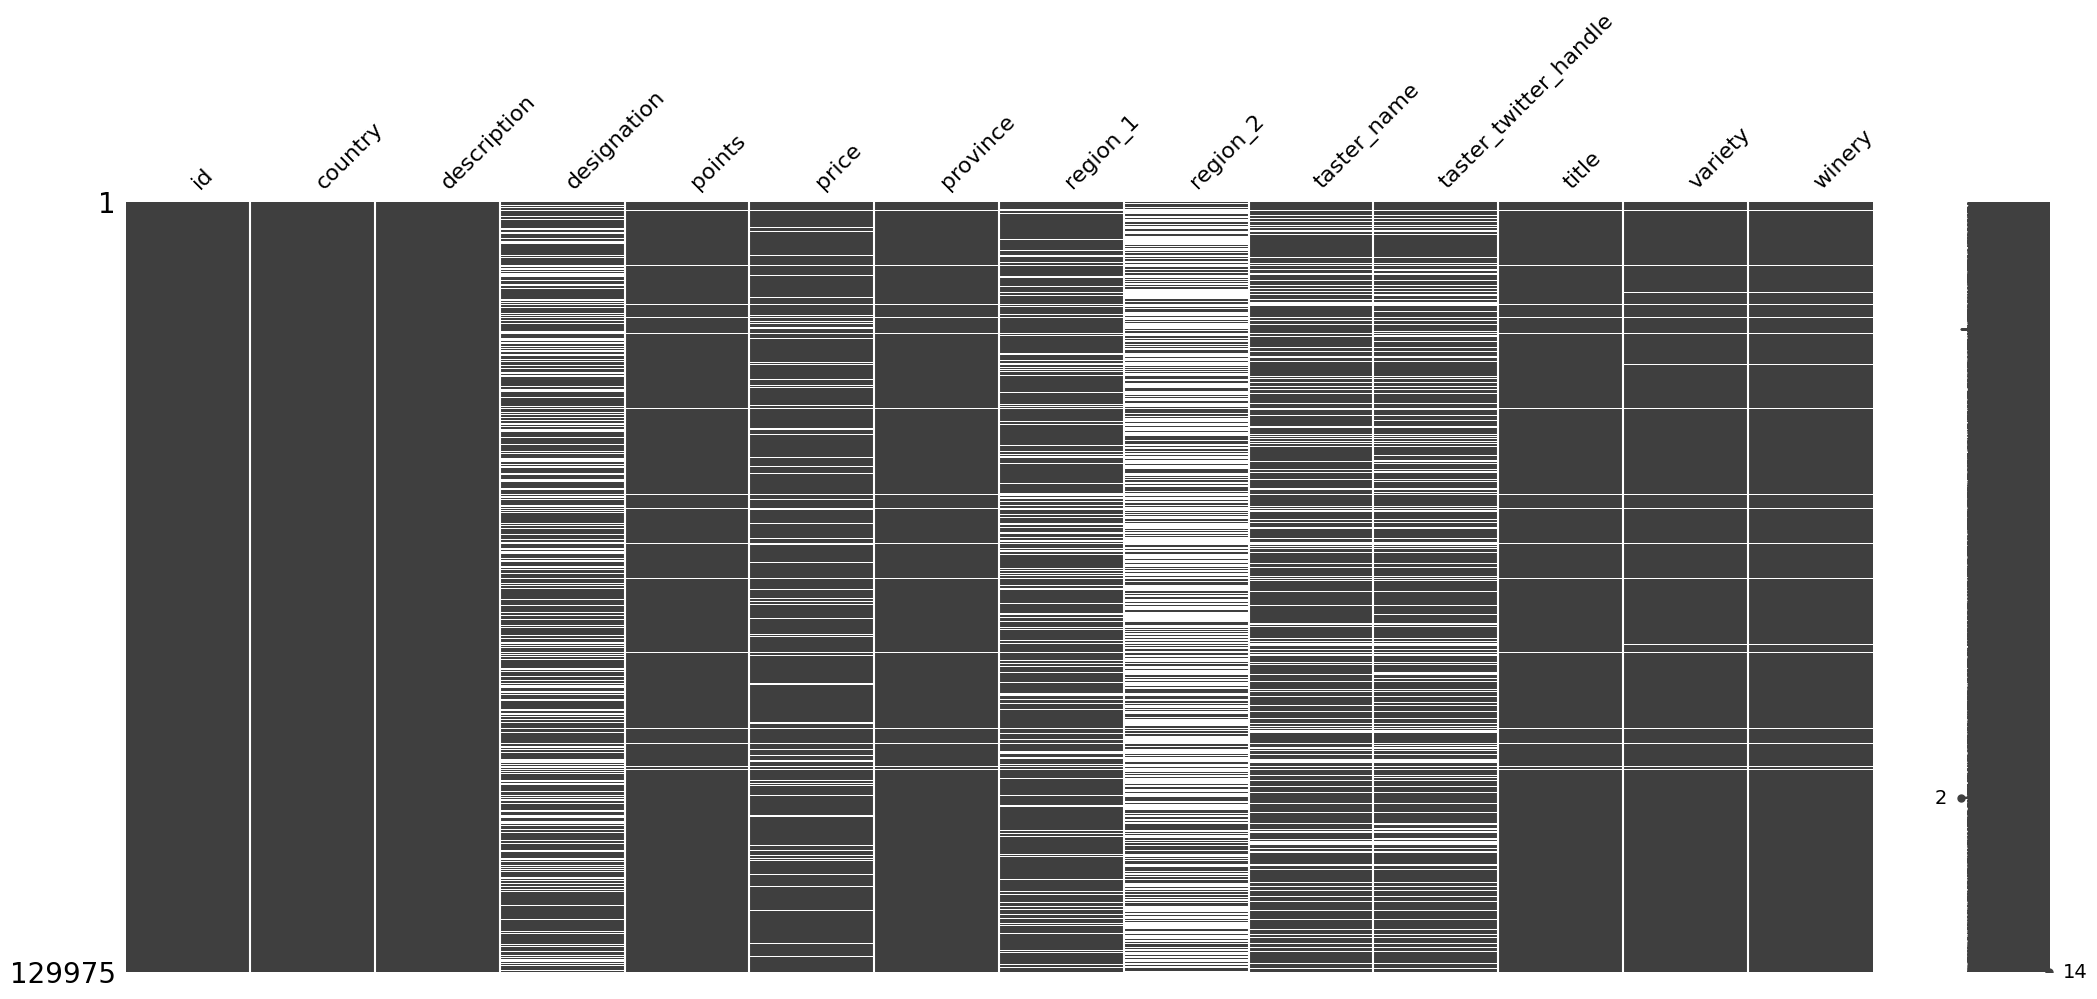

In [ ]:
msno.matrix(df)

**Convertir las columnas ´price' y 'points' a variables numéricas**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129975 entries, 0 to 129974
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     129975 non-null  object 
 1   country                129912 non-null  object 
 2   description            129973 non-null  object 
 3   designation            90405 non-null   object 
 4   points                 127071 non-null  float64
 5   price                  118213 non-null  object 
 6   province               127010 non-null  object 
 7   region_1               106391 non-null  object 
 8   region_2               49496 non-null   object 
 9   taster_name            101227 non-null  object 
 10  taster_twitter_handle  96267 non-null   object 
 11  title                  127071 non-null  object 
 12  variety                127014 non-null  object 
 13  winery                 127013 non-null  object 
dtypes: float64(1), object(13)
memory usa

In [ ]:
def convertir_a_float(df):
    # Columnas a excluir del cambio de tipo
    columnas_excluir = ['id', 'country', 'description', 'designation', 'province', 'region_1', 'region_2',
                        'taster_name', 'taster_twitter_handle', 'title', 'variety', 'winery']

    for col in ['points', 'price']:
        if col in df.columns and col not in columnas_excluir:
            df[col] = pd.to_numeric(df[col], errors='coerce')

    for col in df.columns:
        if col not in columnas_excluir and col not in ['points', 'price']:
            df[col] = df[col].astype('object')

    return df

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129975 entries, 0 to 129974
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     129975 non-null  object 
 1   country                129912 non-null  object 
 2   description            129973 non-null  object 
 3   designation            90405 non-null   object 
 4   points                 127071 non-null  float64
 5   price                  118213 non-null  object 
 6   province               127010 non-null  object 
 7   region_1               106391 non-null  object 
 8   region_2               49496 non-null   object 
 9   taster_name            101227 non-null  object 
 10  taster_twitter_handle  96267 non-null   object 
 11  title                  127071 non-null  object 
 12  variety                127014 non-null  object 
 13  winery                 127013 non-null  object 
dtypes: float64(1), object(13)
memory usa

**Asegurarse de que 'taster_twitter_handle' siga siendo de tipo 'object'**

In [ ]:
df['taster_twitter_handle'] = df['taster_twitter_handle'].astype(str)
df = convertir_a_float(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129975 entries, 0 to 129974
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     129975 non-null  object 
 1   country                129912 non-null  object 
 2   description            129973 non-null  object 
 3   designation            90405 non-null   object 
 4   points                 127071 non-null  float64
 5   price                  118212 non-null  float64
 6   province               127010 non-null  object 
 7   region_1               106391 non-null  object 
 8   region_2               49496 non-null   object 
 9   taster_name            101227 non-null  object 
 10  taster_twitter_handle  129975 non-null  object 
 11  title                  127071 non-null  object 
 12  variety                127014 non-null  object 
 13  winery                 127013 non-null  object 
dtypes: float64(2), object(12)
memory usa

Observación: Se han transformado los datos de las columnas 'points' y 'price' a datos de tipo float64, para poder trabajar con ellos.

In [ ]:
print(f'la cantidad de filas y columnas del df son:{df.shape}')

la cantidad de filas y columnas del df son:(129975, 14)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129975 entries, 0 to 129974
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     129975 non-null  object 
 1   country                129912 non-null  object 
 2   description            129973 non-null  object 
 3   designation            90405 non-null   object 
 4   points                 127071 non-null  float64
 5   price                  118212 non-null  float64
 6   province               127010 non-null  object 
 7   region_1               106391 non-null  object 
 8   region_2               49496 non-null   object 
 9   taster_name            101227 non-null  object 
 10  taster_twitter_handle  129975 non-null  object 
 11  title                  127071 non-null  object 
 12  variety                127014 non-null  object 
 13  winery                 127013 non-null  object 
dtypes: float64(2), object(12)
memory usa

**Valores duplicados**

Identificar los datos duplicados en la columna 'id'

In [ ]:
duplicados_id = df[df['id'].duplicated()]
print(duplicados_id)

Empty DataFrame
Columns: [id, country, description, designation, points, price, province, region_1, region_2, taster_name, taster_twitter_handle, title, variety, winery]
Index: []


Observación: La variable 'id' no tiene valores duplicados.

**Valores nulos**

In [ ]:
df.isnull().sum()
print(df.isnull().sum())

id                           0
country                     63
description                  2
designation              39570
points                    2904
price                    11763
province                  2965
region_1                 23584
region_2                 80479
taster_name              28748
taster_twitter_handle        0
title                     2904
variety                   2961
winery                    2962
dtype: int64


Observación: En la variable numérica 'points' existen 2.904 registos nulos, y en la variable 'price' existen 11.763 valores nulos.
Lo cual es muy similar a los valores que arrojan las columnas 'title' y 'variety' y 'winery', relacionadas al origen de cada vino.

**Generar una columna nueva entre la combinación de las columnas 'region_1' y 'region_2'**

In [ ]:
def combinar_regiones(df):

    def obtener_region(row):
        if pd.notna(row['region_1']):  # Si region_1 tiene valor, usarlo
            return row['region_1']
        elif pd.notna(row['region_2']):  # Si region_1 es nulo, usar region_2
            return row['region_2']
        else:  # Si ambas son nulas, usar province
            return row['province']

    df['region'] = df.apply(obtener_region, axis=1)
    #df.drop(columns=['region_1', 'region_2', 'province'], inplace=True)
    return df

# Aplicar la función
df = combinar_regiones(df)

# Mostrar el resultado
df.head()

,id,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,region
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",VulkÃ Bianco,87.0,NaN,Sicily & Sardinia,Etna,NaN,Kerin OâKeefe,@kerinokeefe,Nicosia 2013 VulkÃ Bianco (Etna),White Blend,Nicosia,Etna
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87.0,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,Douro
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87.0,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwineÂ,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,Willamette Valley
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87.0,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,nan,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,Lake Michigan Shore
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87.0,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwineÂ,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,Willamette Valley


Observación: Para optimizar los resultados nulos de estas columnas, se han combinado para equipararlas con lass columnas 'title', 'variety' y 'winery'.

**Valores nulos en la nueva columna denominada 'region'**

In [ ]:
df.region.value_counts(dropna=False)
print(df.region.value_counts(dropna=False))

region
Napa Valley                       4410
Columbia Valley (WA)              3915
Russian River Valley              3058
NaN                               2965
California                        2615
                                  ... 
Sonoma-Santa Barbara-Mendocino       1
Nasco di Cagliari                    1
Napa-Amador                          1
Sardon de Duero                      1
Texoma                               1
Name: count, Length: 1598, dtype: int64


Observación: Se reducen los datos NaN de esta columna a solo 2.965. Similar a las columnas mencionadas anteriormente.

In [ ]:
filtro = df[(df['region'].isnull()) & (df['points'].isnull())]
filtro.head()

,id,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,region
48,48,US,This bottling resembles the New Zealand paradi...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN
140,140,Italy,"A big, fat, luscious wine with plenty of toast...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN
248,248,US,This seems as if it was assembled from lesser ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN
262,262,US,Beaver Creek makes a variation of Fairytale ev...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN
293,293,Australia,This wine displays ample concentration in its ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN


Observación:  Este filtro muestra que en base a la región, no existe puntaje ni precio de vinos.

In [ ]:
filtro.shape

(2903, 15)

In [ ]:
filtro.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2903 entries, 48 to 129932
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2903 non-null   object 
 1   country                2902 non-null   object 
 2   description            2902 non-null   object 
 3   designation            13 non-null     object 
 4   points                 0 non-null      float64
 5   price                  0 non-null      float64
 6   province               0 non-null      object 
 7   region_1               0 non-null      object 
 8   region_2               0 non-null      object 
 9   taster_name            0 non-null      object 
 10  taster_twitter_handle  2903 non-null   object 
 11  title                  0 non-null      object 
 12  variety                0 non-null      object 
 13  winery                 0 non-null      object 
 14  region                 0 non-null      object 
dtypes: flo

Observación: Se podrían eliminar 2.903 filas, ya que estas contienen datos nulos.


In [ ]:
df = df[~df['id'].isin(filtro['id'])]
df.shape

(127072, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 127072 entries, 0 to 129974
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     127072 non-null  object 
 1   country                127010 non-null  object 
 2   description            127071 non-null  object 
 3   designation            90392 non-null   object 
 4   points                 127071 non-null  float64
 5   price                  118212 non-null  float64
 6   province               127010 non-null  object 
 7   region_1               106391 non-null  object 
 8   region_2               49496 non-null   object 
 9   taster_name            101227 non-null  object 
 10  taster_twitter_handle  127072 non-null  object 
 11  title                  127071 non-null  object 
 12  variety                127014 non-null  object 
 13  winery                 127013 non-null  object 
 14  region                 127010 non-null  o

Observación: Existen 127.072 filas con datos regularizados, y 2.903 filas que no. Esto equivale al 2,28% de los datos del dataset.

**Reemplazar valores nulos por la mediana de las columnas a trabajar**

In [ ]:
df['points'] = df['points'].fillna(df['points'].median())
df['price'] = df['price'].fillna(df['price'].median())

Observación: Se ha decidido reemplazar los valones nulos de las columnas 'points' y 'price' por la mediana.

**Visualización del df mejorado**

<Axes: >

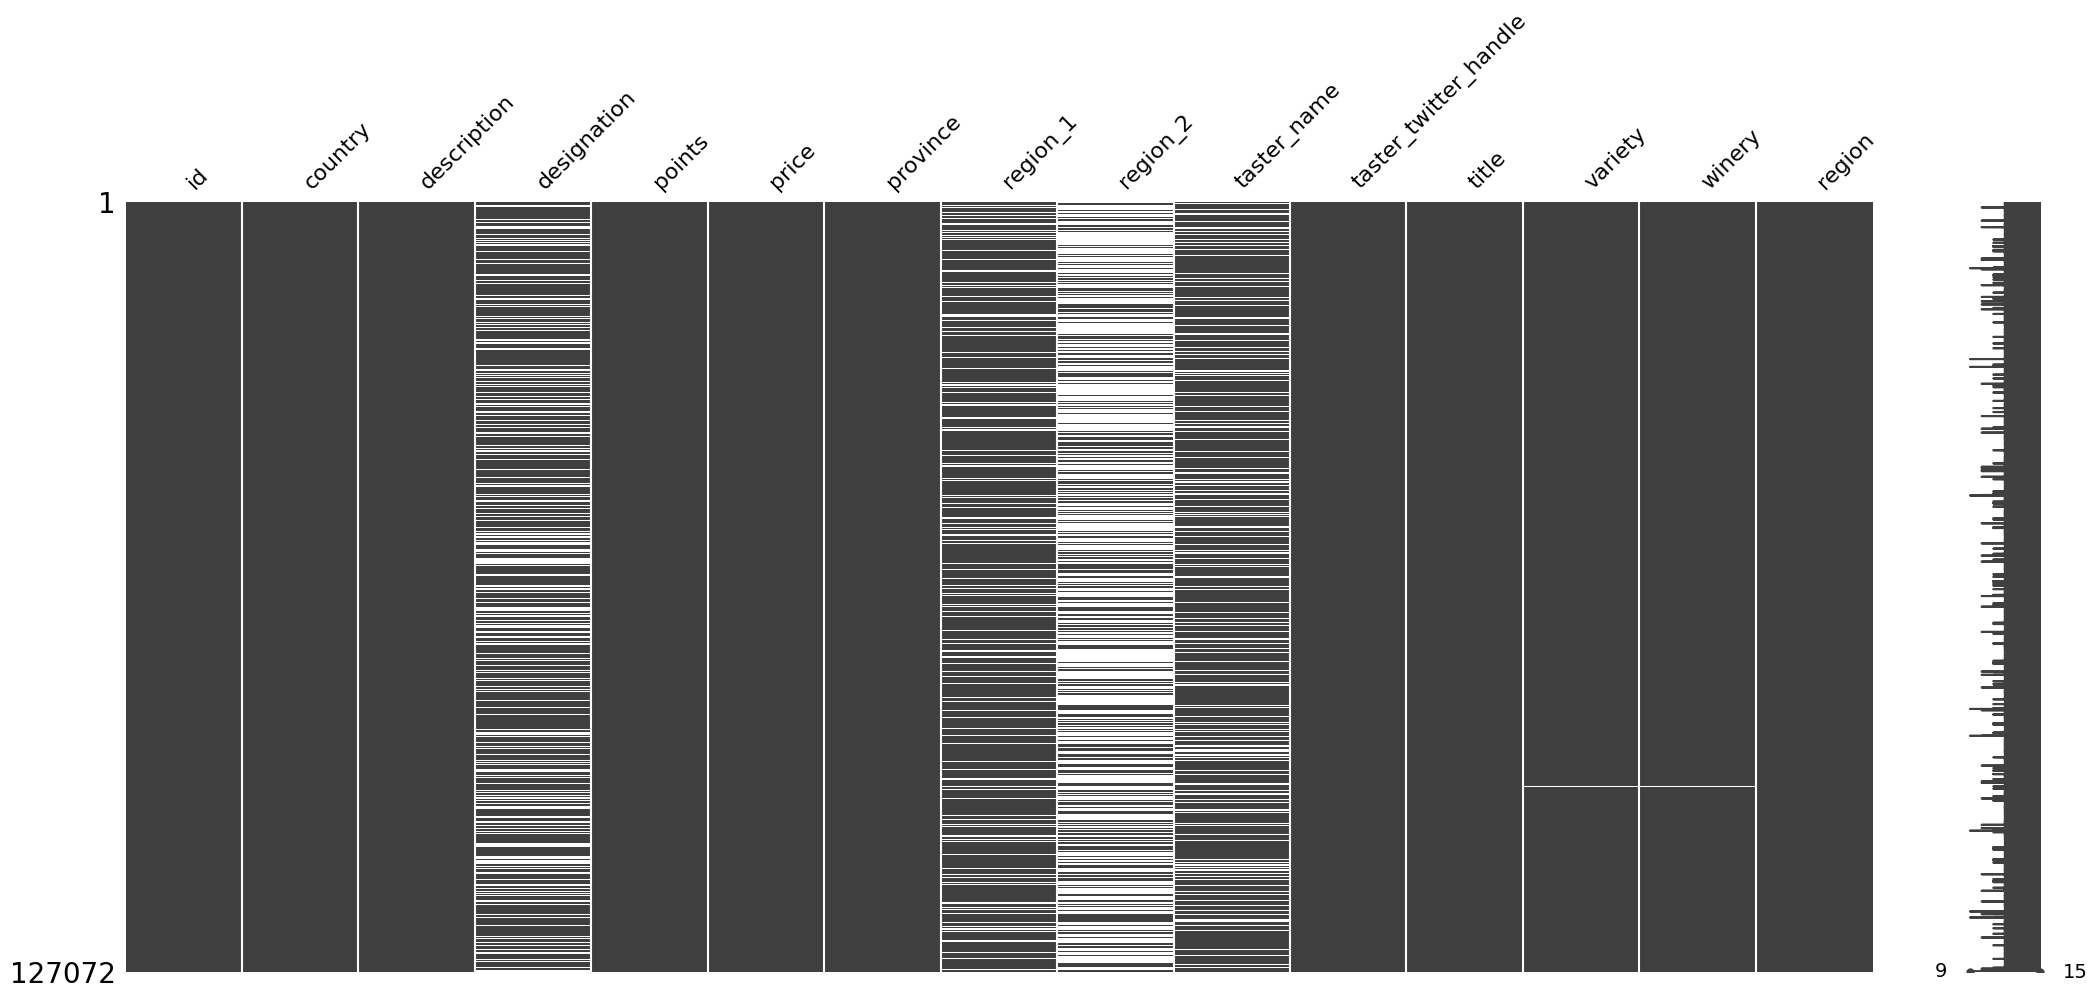

In [ ]:
msno.matrix(df)

Observación: Las columnas 'points' y ' price' ya no tienen datos nulos o celdas vacías.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
points,127072.0,88.439184,3.041197,10.0,86.0,88.0,91.0,100.0
price,127072.0,34.556196,39.479280,4.0,18.0,25.0,40.0,3300.0


In [ ]:
df.describe(percentiles=np.arange(0, 1.1, 0.1)).T

,count,mean,std,min,0%,10%,20%,30%,40%,50%,60%,70%,80%,90%,100%,max
points,127072.0,88.439184,3.041197,10.0,10.0,85.0,86.0,87.0,88.0,88.0,89.0,90.0,91.0,92.0,100.0,100.0
price,127072.0,34.556196,39.479280,4.0,4.0,13.0,16.0,19.0,23.0,25.0,30.0,36.0,45.0,62.0,3300.0,3300.0


Observación: Las variables numéricas con las que se trabajarán tienen un total de 127.072 registros.

In [ ]:
df.shape

(127072, 15)

Observación: Con la limpieza del dataset se tiene que existen 127.072 filas y 15 columnas.

**Ordenar el dataset según la columna 'points' en orden ascendente**

In [ ]:
df = df.sort_values(by='points', ascending=True)
df.head()

,id,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,region
51398,anti-Chardonnay,marked by tart citrus flavors that make it ve...,NaN,85,10.0,25.0,California,California Other,NaN,NaN,Montevina 2010 Pinot Grigio (California),Pinot Grigio,Montevina,NaN,California Other
19564,19562,Spain,"In general O. Fournier gets it right, be it in...",Spiga,80.0,29.0,Northern Spain,Ribera del Duero,NaN,Michael Schachner,@wineschach,O. Fournier 2002 Spiga (Ribera del Duero),Tinto del Pais,O. Fournier,Ribera del Duero
19570,19568,US,"Thin, dry and harsh, with cola flavors that ar...",NaN,80.0,13.0,California,California,California Other,NaN,nan,Congress Springs 2006 Pinot Noir (California),Pinot Noir,Congress Springs,California
19569,19567,US,"A soft, medicinal and uninteresting wine, mark...",NaN,80.0,12.0,California,Paso Robles,Central Coast,NaN,nan,Buzzard Tree 2005 Zinfandel (Paso Robles),Zinfandel,Buzzard Tree,Paso Robles
19572,19570,US,"Soft and awkward, with dull berry flavors that...",NaN,80.0,18.0,California,Paso Robles,Central Coast,NaN,nan,Four Vines 2005 Syrah (Paso Robles),Syrah,Four Vines,Paso Robles


**Visualización de las filas ordenadas del dataset**

In [ ]:
df = df.sort_values(by='points', ascending=True)
df.tail(5)

,id,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,region
89733,89729,France,This new release from a great vintage for Char...,Le Mesnil Blanc de Blancs Brut,100.0,617.0,Champagne,Champagne,NaN,Roger Voss,@vossroger,Salon 2006 Le Mesnil Blanc de Blancs Brut Char...,Chardonnay,Salon,Champagne
36531,36528,France,This is a fabulous wine from the greatest Cham...,Brut,100.0,259.0,Champagne,Champagne,NaN,Roger Voss,@vossroger,Krug 2002 Brut (Champagne),Champagne Blend,Krug,Champagne
45801,45798,US,Tasted in a flight of great and famous Napa wi...,NaN,100.0,200.0,California,Napa Valley,Napa,NaN,nan,Cardinale 2006 Cabernet Sauvignon (Napa Valley),Cabernet Sauvignon,Cardinale,Napa Valley
42200,42197,Portugal,This is the latest release of what has long be...,Barca-Velha,100.0,450.0,Douro,NaN,NaN,Roger Voss,@vossroger,Casa Ferreirinha 2008 Barca-Velha Red (Douro),Portuguese Red,Casa Ferreirinha,Douro
111759,111755,France,This is the finest Cheval Blanc for many years...,NaN,100.0,1500.0,Bordeaux,Saint-Ãmilion,NaN,Roger Voss,@vossroger,ChÃ¢teau Cheval Blanc 2010 Saint-Ãmilion,Bordeaux-style Red Blend,ChÃ¢teau Cheval Blanc,Saint-Ãmilion


Observación: Se visualizan las últimas cinco filas del dataset en orden ascendente con respecto a la columna 'points'.

**Visualización de las últimas cinco filas ordenadas del dataset**

In [ ]:
df = df.sort_values(by='price', ascending=True)
df.tail(5)

,id,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,region
65356,65352,France,This extravagantly perfumed wine has great jui...,NaN,97.0,2000.0,Bordeaux,Pomerol,NaN,Roger Voss,@vossroger,ChÃ¢teau PÃ©trus 2011 Pomerol,Bordeaux-style Red Blend,ChÃ¢teau PÃ©trus,Pomerol
120395,120391,US,The nose on this single-vineyard wine from a s...,Roger Rose Vineyard,91.0,2013.0,California,Arroyo Seco,Central Coast,Matt Kettmann,@mattkettmann,Blair 2013 Roger Rose Vineyard Chardonnay (Arr...,Chardonnay,Blair,Arroyo Seco
15840,15840,France,The wine is a velvet glove in an iron fist. Th...,NaN,96.0,2500.0,Bordeaux,Pomerol,NaN,Roger Voss,@vossroger,ChÃ¢teau PÃ©trus 2014 Pomerol,Bordeaux-style Red Blend,ChÃ¢teau PÃ©trus,Pomerol
98384,98380,France,"A superb wine from a great year, this is power...",NaN,96.0,2500.0,Burgundy,La RomanÃ©e,NaN,Roger Voss,@vossroger,Domaine du Comte Liger-Belair 2010 La RomanÃ©e,Pinot Noir,Domaine du Comte Liger-Belair,La RomanÃ©e
80294,80290,France,This ripe wine shows plenty of blackberry frui...,NaN,88.0,3300.0,Bordeaux,MÃ©doc,NaN,Roger Voss,@vossroger,ChÃ¢teau les Ormes Sorbet 2013 MÃ©doc,Bordeaux-style Red Blend,ChÃ¢teau les Ormes Sorbet,MÃ©doc


Observación: Se visualizan las últimas cinco filas del dataset en orden ascendente con respecto a la columna 'price'.

**Definir el df_final transformado**

In [ ]:
df_final = df.copy()
df_final.shape

(127072, 15)

**Filtrar a los vinos que pertenecen al percentil mejor evaluado**

In [ ]:
filtro_92 = df[df['points'] >= 92]
value_counts = filtro_92['points'].value_counts()
value_counts
print(filtro_92['points'].value_counts())

points
92.0     9362
93.0     6304
94.0     3651
95.0     1486
96.0      502
97.0      218
98.0       74
99.0       32
100.0      17
Name: count, dtype: int64


In [ ]:
count_92 = filtro_92['points'].count()
print("Total de registros de vinos mejor evaluados:", count_92)
total_92 = filtro_92['points'].sum()
print(total_92.dtype)

Total de registros de vinos mejor evaluados: 21646
float64


Observación: En percentil de vinos mejor evaluados existen registrados 21.646 vinos con puntaje mayor o igual a 92. De estos, 17 vinos tienen la puntuación máxima.


**Filtrar a los vinos que pertenecen al percentil mas costoso**

In [ ]:
filtro_62 = df[df['price'] >= 62.0]
value_counts = filtro_62['price'].value_counts()
value_counts
print(filtro_62['price'].value_counts())

price
65.0      1574
75.0      1357
70.0      1081
80.0       864
85.0       645
          ... 
767.0        1
1900.0       1
780.0        1
2013.0       1
3300.0       1
Name: count, Length: 325, dtype: int64


In [ ]:
count_62 = filtro_62['price'].count()
print("Total de registros de vinos mas costosos:", count_62)
total_62 = filtro_62['price'].sum()
print(total_62.dtype)

Total de registros de vinos mas costosos: 12793
float64


Observación: En el percentil de vinos mas costosos existen registrados 12.793 vinos con un precio mayor o igual a 62.0. De estos, 1 vinos tienen el precio máximo.

**Top 5 de los vinos con mejor calificación**

In [ ]:
top_5 = df.nlargest(5, 'points')
top_5

,id,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,region
113933,113929,US,In 2005 Charles Smith introduced three high-en...,Royal City,100.0,80.0,Washington,Columbia Valley (WA),Columbia Valley,Paul Gregutt,@paulgwineÂ,Charles Smith 2006 Royal City Syrah (Columbia ...,Syrah,Charles Smith,Columbia Valley (WA)
58356,58352,France,"This is a magnificently solid wine, initially ...",NaN,100.0,150.0,Bordeaux,Saint-Julien,NaN,Roger Voss,@vossroger,ChÃ¢teau LÃ©oville Barton 2010 Saint-Julien,Bordeaux-style Red Blend,ChÃ¢teau LÃ©oville Barton,Saint-Julien
45801,45798,US,Tasted in a flight of great and famous Napa wi...,NaN,100.0,200.0,California,Napa Valley,Napa,NaN,nan,Cardinale 2006 Cabernet Sauvignon (Napa Valley),Cabernet Sauvignon,Cardinale,Napa Valley
7335,7335,Italy,Thick as molasses and dark as caramelized brow...,Occhio di Pernice,100.0,210.0,Tuscany,Vin Santo di Montepulciano,NaN,NaN,nan,Avignonesi 1995 Occhio di Pernice (Vin Santo ...,Prugnolo Gentile,Avignonesi,Vin Santo di Montepulciano
89732,89728,France,This latest incarnation of the famous brand is...,Cristal Vintage Brut,100.0,250.0,Champagne,Champagne,NaN,Roger Voss,@vossroger,Louis Roederer 2008 Cristal Vintage Brut (Cha...,Champagne Blend,Louis Roederer,Champagne


Observación: Se visualizan cinco de los vinos mejor evaluados, y estos tienen un puntaje de 100.0 puntos.

**Calculamos la correlación variables numéricas**

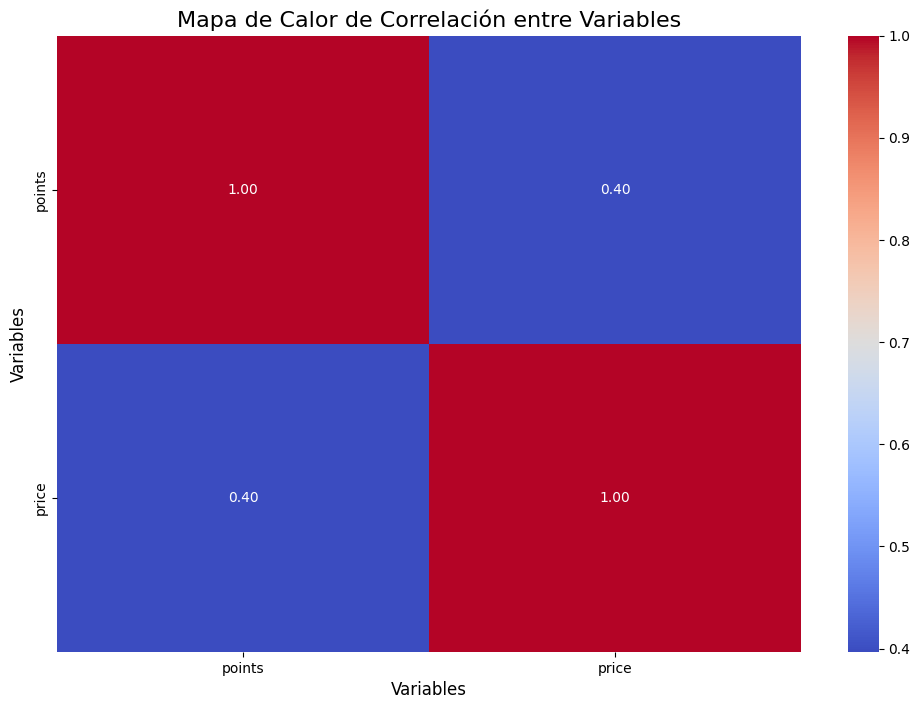

In [ ]:
corr = df[['points', 'price',]].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", annot_kws={"size": 10}, cmap='coolwarm')
plt.title('Mapa de Calor de Correlación entre Variables', fontsize=16)
plt.xlabel('Variables', fontsize=12)
plt.ylabel('Variables', fontsize=12)
plt.show()

Observación: Existe una correlación de 0.40 entre las variables numéricas del dataset, y su correlación es positiva pero a la vez es relativamente media a baja.

# **Análisis Exploratorio de datos**

**Total de registros de puntuación**

In [ ]:
count_puntuación = df['points'].count()
print("Total de registros de puntuación:", count_puntuación)
total_puntuación = df['points'].sum()
print(total_puntuación.dtype)

Total de registros de puntuación: 127072
float64


**Evaluación de cada variedad de vinos**

In [ ]:
df[['variety','points']].groupby('variety').agg(['count','min','median','max'])
print(df[['variety','points']].groupby('variety').agg(['count','min','median','max']))

            points                   
             count   min median   max
variety                              
Abouriou         2  87.0   89.0  91.0
Agiorgitiko     63  83.0   87.0  92.0
Aglianico      355  81.0   89.0  97.0
Aidani           1  82.0   82.0  82.0
Airen            3  80.0   82.0  83.0
...            ...   ...    ...   ...
Zinfandel     2681  80.0   88.0  97.0
Zlahtina         2  84.0   86.0  88.0
Zweigelt       204  82.0   89.0  94.0
ÃalkarasÄ±      2  86.0   86.5  87.0
Å½ilavka         1  88.0   88.0  88.0

[699 rows x 4 columns]


Observación: Variedad de vinos según la evaluación realizada por los catadores.


**Las variedades de vinos mejor evaluadas**

In [ ]:
vinos_max_100 = df[['variety', 'winery', 'price', 'taster_name']][df['points'] == 100]
print(vinos_max_100)

                           variety                        winery   price  \
113933                       Syrah                 Charles Smith    80.0   
58356     Bordeaux-style Red Blend     ChÃ¢teau LÃ©oville Barton   150.0   
45801           Cabernet Sauvignon                     Cardinale   200.0   
7335              Prugnolo Gentile                    Avignonesi   210.0   
89732              Champagne Blend                Louis Roederer   250.0   
36531              Champagne Blend                          Krug   259.0   
111758           Sangiovese Grosso              Casanova di Neri   270.0   
345                         Muscat   Chambers Rosewood Vineyards   350.0   
111760    Bordeaux-style Red Blend  ChÃ¢teau LÃ©oville Las Cases   359.0   
42200               Portuguese Red              Casa Ferreirinha   450.0   
39289                       Merlot         Tenuta dell'Ornellaia   460.0   
45784                   Sangiovese                  Biondi Santi   550.0   
89733       

Observación: Las variedades de vinos con puntaje igual a 100 son: Bordeaux-style White Blend, Moscatel, Champagne Blend, Prugnolo Gentile, Chardonnay, Sangiovese, Portuguese Red, Merlot, Port, Sanguiovese Grosso, Syrah, Bordeaux-style Red Blend y Cabernet Sauvignon.

**Las diez variedades de vinos mejor evaluadas**

In [ ]:
resultado = df[['variety', 'points']].groupby('variety').agg(['count', 'min', 'median', 'max'])
top_10 = resultado['points']['max'].sort_values(ascending=False).head(10)
top_10 = top_10.reset_index()
top_10.columns = ['variety', 'max_points']
print(top_10.head(10))

                      variety  max_points
0            Prugnolo Gentile       100.0
1           Sangiovese Grosso       100.0
2                  Sangiovese       100.0
3    Bordeaux-style Red Blend       100.0
4  Bordeaux-style White Blend       100.0
5              Portuguese Red       100.0
6                        Port       100.0
7                      Merlot       100.0
8                       Syrah       100.0
9                      Muscat       100.0


Observación: Las diez variedades de vinos mejor evaluadas son: Bordeaux-style White Blend, Moscatel, Champagne Blend, Prugnolo Gentile, Chardonnay, Sangiovese, Portuguese Red, Merlot, Port y Sanguiovese Grosso.

**Evaluación de cada bodega de vinos**

In [ ]:
top_bodega = df.groupby(['winery', 'taster_name','country'])['points'].max().sort_values(axis=0, ascending=False)
top_bodega = top_bodega.reset_index()
top_bodega.columns = ['winery', 'taster_name','country', 'points']
print(top_bodega)

                            winery        taster_name    country  points
0                     Biondi Santi    Kerin OâKeefe      Italy   100.0
1                    Charles Smith       Paul Gregutt         US   100.0
2              ChÃ¢teau Haut-Brion         Roger Voss     France   100.0
3       ChÃ¢teau Lafite Rothschild         Roger Voss     France   100.0
4      Chambers Rosewood Vineyards     Joe Czerwinski  Australia   100.0
...                            ...                ...        ...     ...
16444                  TorresManur  Michael Schachner      Spain    80.0
16445            Bodegas del Mundo  Michael Schachner      Spain    80.0
16446                      Twisted  Michael Schachner  Argentina    80.0
16447                 Vega de Tera  Michael Schachner      Spain    80.0
16448                 Vega Murillo  Michael Schachner      Spain    80.0

[16449 rows x 4 columns]


Observación: Bodegas de vinos según la evaluación realizada por los catadores.

**Las diez bodegas o viñedos mejor evaluadas**

In [ ]:
top_bodega = df.groupby(['winery', 'taster_name','country'])['points'].max().sort_values(axis=0, ascending=False)
top_bodega = top_bodega.reset_index()
top_bodega.columns = ['winery', 'taster_name','country', 'points']
print(top_bodega.head(10))

                        winery      taster_name    country  points
0                 Biondi Santi  Kerin OâKeefe      Italy   100.0
1                Charles Smith     Paul Gregutt         US   100.0
2          ChÃ¢teau Haut-Brion       Roger Voss     France   100.0
3   ChÃ¢teau Lafite Rothschild       Roger Voss     France   100.0
4  Chambers Rosewood Vineyards   Joe Czerwinski  Australia   100.0
5               Louis Roederer       Roger Voss     France   100.0
6                         Krug       Roger Voss     France   100.0
7              Quinta do Noval       Roger Voss   Portugal   100.0
8                        Salon       Roger Voss     France   100.0
9        ChÃ¢teau Cheval Blanc       Roger Voss     France   100.0


Observación: Las diez bodegas de vinos mejor evaluadas son: Chambers Rosewood Vineyards, ChÃ¢teau Cheval Blanc, Casa Ferreirinha, ChÃ¢teau Lafite Rothschild, ChÃ¢teau Haut-Brion, Louis Roederer, ChÃ¢teau LÃ©oville Las Cases, Biondi Santi, Charles Smith y ChÃ¢teau LÃ©oville Barton.

**Evaluación de vinos según su país de origen**

In [ ]:
top_pais = df.groupby(['country', 'taster_name','variety'])['points'].max().sort_values(axis=0, ascending=False)
top_pais = top_pais.reset_index()
top_pais.columns = ['country', 'taster_name','variety', 'points']
print(top_pais)

     country        taster_name                     variety  points
0     France         Roger Voss    Bordeaux-style Red Blend   100.0
1      Italy    Kerin OâKeefe                  Sangiovese   100.0
2     France         Roger Voss             Champagne Blend   100.0
3     France         Roger Voss                  Chardonnay   100.0
4     France         Roger Voss  Bordeaux-style White Blend   100.0
...      ...                ...                         ...     ...
2430      US    Susan Kostrzewa                    Nebbiolo    80.0
2431   Spain  Michael Schachner          Shiraz-Tempranillo    80.0
2432      US  Michael Schachner             MÃ¼ller-Thurgau    80.0
2433  Mexico  Michael Schachner                    Cinsault    80.0
2434  France  Michael Schachner                    Viognier    80.0

[2435 rows x 4 columns]


Observación: Países productores de vinos según la evaluación realizada por los catadores.

**Los diez paises con vinos mejor evaluados**

In [ ]:
top_pais = df.groupby('country')['points'].max().sort_values(ascending=False).head(10)
top_pais = top_pais.reset_index()
top_pais.columns = ['country', 'points']
print(top_pais)

     country  points
0  Australia   100.0
1   Portugal   100.0
2         US   100.0
3      Italy   100.0
4     France   100.0
5    Austria    98.0
6    Germany    98.0
7      Spain    98.0
8    Hungary    97.0
9  Argentina    97.0


Observación: Los diez paises con mejor evaluación en sus vinos según los expertos son: Italia, Estados Unidos, Australia, Francia, Portugal, Alemania, Austria, España, Hungría y Argentina.

**Descripción asignada por los catadores a los diez vinos mejor evaluados**

In [ ]:
print(df.columns)
df.columns = df.columns.str.strip()  # Elimina espacios extra en los nombres de las columnas
df = df.dropna(subset=['variety', 'points'])
# Verificar las columnas en el DataFrame
print(df.columns)

# Eliminar espacios extra en los nombres de las columnas
df.columns = df.columns.str.strip()

# Asegurarse de que no haya valores faltantes en las columnas necesarias
df = df.dropna(subset=['variety', 'points', 'description'])

# Ordenar los vinos por puntaje de mayor a menor y seleccionar los primeros 10
top_10_vinos = df[['variety', 'points', 'description']].sort_values(by='points', ascending=False).head(10)

# Mostrar el resultado
print(top_10_vinos)

Index(['id', 'country', 'description', 'designation', 'points', 'price',
       'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery', 'region'],
      dtype='object')
Index(['id', 'country', 'description', 'designation', 'points', 'price',
       'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery', 'region'],
      dtype='object')
                         variety  points  \
111759  Bordeaux-style Red Blend   100.0   
45784                 Sangiovese   100.0   
58356   Bordeaux-style Red Blend   100.0   
36531            Champagne Blend   100.0   
39289                     Merlot   100.0   
7335            Prugnolo Gentile   100.0   
89732            Champagne Blend   100.0   
45801         Cabernet Sauvignon   100.0   
345                       Muscat   100.0   
42200             Portuguese Red   100.0   

                                              description  
111

Observación: Los diez vinos mejor evaluados tienen estas características:

Bordeaux-style Red Blend:
1.- Un vino enormemente poderoso, lleno de taninos oscuros y sombríos. Es un vino para un envejecimiento a largo plazo de verdad, una visión escultórica de la estructura clásica de Burdeos con un toque elegante y maduro.

2.- Casi negro en color, este impresionante vino es hermoso, rico y denso. Es grandioso y poderoso, con un fuerte sentido de su propia importancia. Los hermosos taninos y las fragantes frutas de grosella negra son palpables. Es un gran vino, con un enorme potencial.

Syrah:
En 2005, Charles Smith introdujo tres Syrahs de alta gama. En 2006, Smith elaboró un vino mejor que cada uno de ellos, combinándolos en un solo vino: Royal City Syrah. Ricos aromas de frutas moradas, carne ahumada, cedro, lápiz de plomo, tierra húmeda, entre otros, proclaman un vino con verdadera gravitas. No falta nada, desde el primer olfato hasta el último sorbo, el vino cumple en todos los niveles. Complejo, maravillosamente equilibrado, poderoso y detallado.

Prugnolo Gentile:
Espeso como melaza y oscuro como el azúcar moreno caramelizado, el vino fluye de la botella liberando aromas concentrados de dulce de leche, toffee, miel, regaliz, café, resina y jarabe de arce. Las uvas de la zona de Montepulciano se secan en una habitación ventilada y el vino envejece durante más de 10 años en pequeños barriles de roble, lo que da como resultado una concentración espesa y oscura. No lo combines con comida: un Vin Santo tan bueno como este merece ser disfrutado solo, como un llamado "vino de meditación".

Sangiovese Grosso:
Basta solo unos momentos para apreciar la enormidad, intensidad y belleza general de este vino emblemático. Cerretalto siempre es una expresión de Brunello de puntuaciones altas, pero las condiciones ideales de la cosecha de 2007 lo elevan a la perfección terrenal. Oscuro y carnoso, el vino ofrece aromas en constante evolución de frutas oscuras, chocolate, especias y tabaco. La acidez está cuidadosamente equilibrada con el grosor y la rica textura del vino. El final es largo, sedoso y elegante. Guarda esta botella en tu bodega durante 10 años o más.

Champagne Blend:
Este es un vino fabuloso de la mejor cosecha de Champagne de este siglo hasta ahora. Aún joven, combina casi cantidades iguales de Pinot Noir y Chardonnay, complementadas con Pinot Meunier. La mineralidad y las ricas frutas de manzana y frutas verdes están equilibradas, y la acidez penetra en el vino con una línea pura y perfumada de frescura. El vino se puede beber ahora, pero envejecerá bien durante la década de 2020.

Portuguese Red:
Esta es la última añada de lo que durante mucho tiempo ha sido considerado el vino icónico de Portugal. Y es magnífico. La última cosecha fue la de 2004 y la espera ha demostrado ser valiosa. Con su enorme amplitud y extensión de sabores y su rica estructura, es una manifestación superbia de los grandes viñedos del Douro Superior. Grandes y audaces frutas y acidez se combinan con los taninos y la concentración. Guárdalo durante muchos años o, al menos, espera hasta 2022.

Moscatel:
Este vino contiene material de más de 100 años, pero no muestra signos de fragilidad. Al contrario, está concentrado por el paso del tiempo y debería mantenerse en la botella indefinidamente. Tiene un color marrón oscuro como el café, con aromas deliciosos de rancio, higo seco, melaza y té negro, y a pesar de su enorme concentración, evita un peso excesivo. Y es sorprendentemente complejo y fresco en el final casi interminable.

Sangiovesse:
Este hermoso y fragante vino se abre con los aromas clásicos del Sangiovese, como violeta, rosa, frutos rojos perfumados, cuero nuevo y un toque de especias para hornear. El elegante y radiante paladar ofrece cereza Marasca triturada, fresa madura, canela, té negro y un toque de tabaco de pipa. Taninos firmes y ultrafinos y una acidez brillante ofrecen una estructura apta para el envejecimiento y un equilibrio impecable. Ya es impresionante, pero evolucionará durante décadas. Beber entre 2020 y 2050.

Port:
Un vino potente y maduro, fuertemente influenciado por sus taninos, frutas negras muy maduras y una gran estructura. Tiene todas las características de un Porto de cosecha de larga vida: muy rico, con una textura densa y firme. Este es un vino asombroso, impresionante y concentrado, con un gran potencial. Proviene de una parcela de vides no injertadas en Noval.


**Análisis univariado**

In [ ]:
data = df[['points', 'price']]
df = pd.DataFrame(data)

# Seleccionar las columnas correctas
data = df[['points', 'price']]

# Mostrar el tipo de las variables
print(df.dtypes)

points    float64
price     float64
dtype: object


In [ ]:
df.shape

(127013, 2)

In [ ]:
# Cálculo de la media
df.mean()

,0
points,88.439609
price,34.559431


Observación: El puntaje medio es de 88.44 puntos, y el precio medio de los vinos es de US$ 34.56.-

In [ ]:
# Media geométrica
stats.gmean(df)

array([88.38757506, 27.30783388])

Observación: La media geométrica del puntaje es de 88.39 puntos, y del precio medio de los vinos es de US$ 27.31.-

In [ ]:
# Media armónica
stats.hmean(df)

array([88.33552532, 22.89401981])

Observación: La media armónica del puntaje es de 88.34 puntos, y del precio medio de los vinos es de US$ 22.89.-

In [ ]:
# Media recortada (20%, es decir, quitamos el 10% más bajo y el 10% más alto)
trim_mean(df, 0.2)

array([88.39987403, 27.1779055 ])

Observación: La media recortada del puntaje es de 88.39 puntos, y del precio medio de los vinos es de US$ 27.18.-

In [ ]:
df.median()

,0
points,88.0
price,25.0


Observación: La mediana del puntaje es de 88 puntos, y del precio de los vinos es de US$ 25.-

In [ ]:
# Cálculo de la moda
statistics.mode(df['points'])
statistics.mode(df['price'])
print("Moda de la puntuación:", statistics.mode(df['points']))
print("Moda del precio:", statistics.mode(df['price']))

Moda de la puntuación: 88.0
Moda del precio: 25.0


Observación: La moda de la puntuación es de 88 puntos. Esto quiere decir que el puntaje que mas se repite es: 88. Para la variable 'price', el precio que mas se repite es: US$ 25.-

Media de la puntuación: 88.4396085440073
Mediana de la puntuación: 88.0
Moda de la puntuación: 88.0


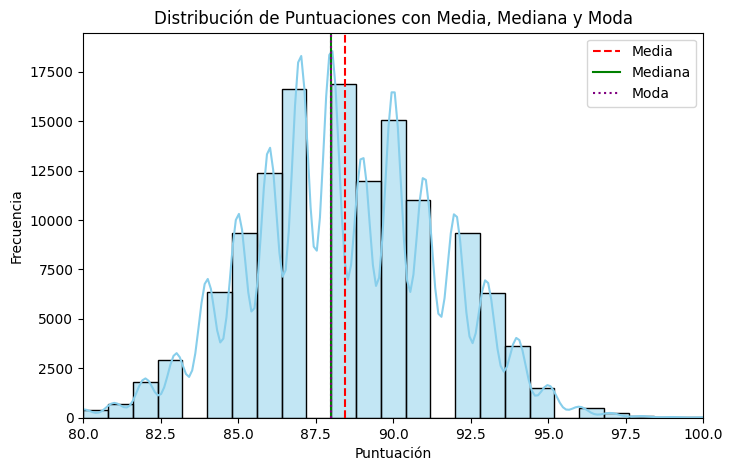

In [ ]:
# Cálculo de la media, mediana y moda
media_puntuación = df['points'].mean()
mediana_puntuación = df['points'].median()
moda_puntuación = df['points'].mode()[0]

print("Media de la puntuación:", media_puntuación)
print("Mediana de la puntuación:", mediana_puntuación)
print("Moda de la puntuación:", moda_puntuación)

# Visualización de la distribución de la puntuación
plt.figure(figsize=(8, 5))
sns.histplot(df['points'], kde=True, color='skyblue', bins=25)
plt.axvline(media_puntuación, color='red', linestyle='--', label='Media')
plt.axvline(mediana_puntuación, color='green', linestyle='-', label='Mediana')
plt.axvline(moda_puntuación, color='purple', linestyle=':', label='Moda')
plt.xlabel('Puntuación')
plt.ylabel('Frecuencia')
plt.legend()

# Establecer límites del eje x para centrar la visualización
plt.xlim(80, 100)

plt.title('Distribución de Puntuaciones con Media, Mediana y Moda')

plt.show()

Observación: La moda y la mediana de la puntuación es de 88 puntos. La media de la puntuación es de 88.44 puntos. Este gráfico muestra que la distribución de los datos tiende a seguir una distribución gausiana.-

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 127013 entries, 126100 to 80294
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   points  127013 non-null  float64
 1   price   127013 non-null  float64
dtypes: float64(2)
memory usage: 2.9 MB


In [ ]:
df.shape

(127013, 2)

Media del precio: 34.55943092439357
Mediana del precio: 25.0
Moda del precio: 25.0


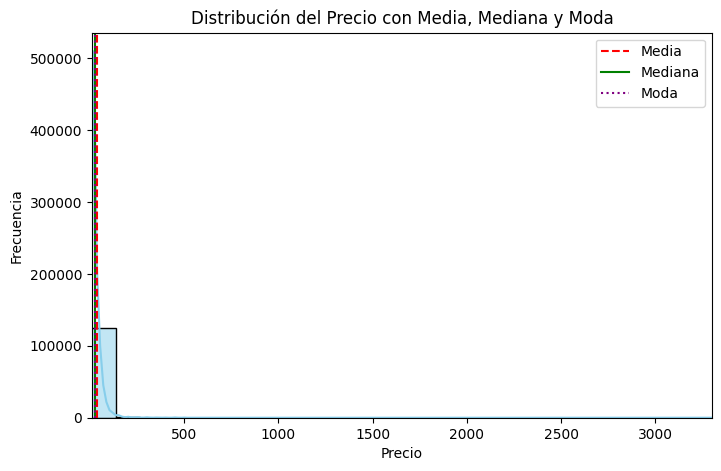

In [ ]:
# Cálculo de la media, mediana y moda
media_precio = df['price'].mean()
mediana_precio = df['price'].median()
moda_precio = df['price'].mode()[0]

print("Media del precio:", media_precio)
print("Mediana del precio:", mediana_precio)
print("Moda del precio:", moda_precio)

# Visualización de la distribución del precio
plt.figure(figsize=(8, 5))
sns.histplot(df['price'], kde=True, color='skyblue', bins=25)
plt.axvline(media_precio, color='red', linestyle='--', label='Media')
plt.axvline(mediana_precio, color='green', linestyle='-', label='Mediana')
plt.axvline(moda_precio, color='purple', linestyle=':', label='Moda')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.legend()

# Establecer límites del eje x para centrar la visualización
plt.xlim(10, 3300)

plt.title('Distribución del Precio con Media, Mediana y Moda')
plt.show()

Observación: La moda y la mediana del precio es de US $25. La media del precio es de US $34.56. Este gráfico muestra que una distribución sesgada a la izquierda.-

In [ ]:
df.shape

(127013, 2)

In [ ]:
data = df[['points', 'price']]
df = pd.DataFrame(data)

# Cálculo de la simetría (skewness)
sesgo = df['points'].skew()
print("Skewness de la distribución del puntaje:", sesgo)

Skewness de la distribución del puntaje: 0.04841012344574659


Observación: Para la variable puntaje, existe una distribución sesgada hacia la derecha (positiva).

In [ ]:
data = df[['points', 'price']]
df = pd.DataFrame(data)

# Crear DataFrame con nombre de columna
df = pd.DataFrame(data, columns=['price'])

# Cálculo de la simetría (skewness)
sesgo = df['price'].skew()
print("Skewness de la distribución del precio:", sesgo)

Skewness de la distribución del precio: 18.96619551563438


Observación: Para la variable precio, existe una elevada distribución sesgada hacia la derecha (positiva).

In [ ]:
#data = df[['points', 'price']]
df = pd.DataFrame(data)

# Cálculo de la curtosis
curtosis = stats.kurtosis(data)

print(f'Curtosis: {curtosis}')

Curtosis: [-2.94852904e-01  9.16449570e+02]


Observación: Existe curtosis negativa en la variable puntaje y positiva en la variable precio

In [ ]:
df.shape

(127013, 2)

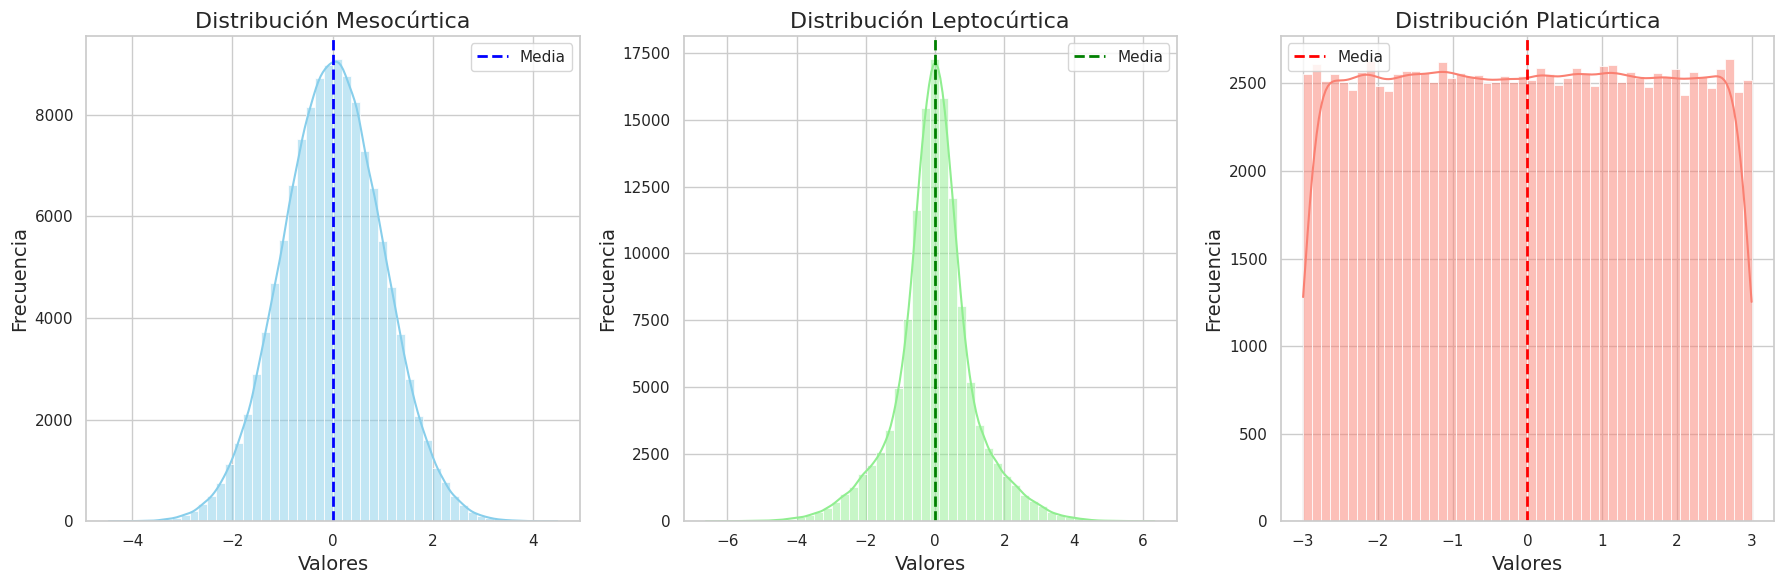

In [ ]:
# Configuración estética de los gráficos
sns.set(style="whitegrid")

# Tamaño del conjunto de datos
data_size = 127013  # Definimos el tamaño de los datos a generar

# Generar datos para diferentes distribuciones
np.random.seed(42)

# 1. Distribución Mesocúrtica (Normal)
data_normal = np.random.normal(loc=0, scale=1, size=data_size)

# 2. Distribución Leptocúrtica (mayor pico y colas más pesadas)
# Aseguramos que 'data_lepto' tenga exactamente 'data_size' elementos
half_size = data_size // 2
data_lepto = np.concatenate([
    np.random.normal(loc=0, scale=0.5, size=half_size),  # Pico más pronunciado
    np.random.normal(loc=0, scale=1.5, size=data_size - half_size)   # Colas más pesadas, ajustamos el tamaño
])

# 3. Distribución Platicúrtica (menor pico y colas más ligeras)
data_plati = np.random.uniform(low=-3, high=3, size=data_size)

# Crear un DataFrame para organizar los datos
df_dist = pd.DataFrame({
    'Mesocúrtica': data_normal,
    'Leptocúrtica': data_lepto,
    'Platicúrtica': data_plati
})

# Visualizar las distribuciones
plt.figure(figsize=(18, 6))

# Gráfico de la distribución Mesocúrtica
plt.subplot(1, 3, 1)
sns.histplot(df_dist['Mesocúrtica'], kde=True, color='skyblue', bins=50)
plt.axvline(df_dist['Mesocúrtica'].mean(), color='blue', linestyle='--', linewidth=2, label='Media')
plt.title("Distribución Mesocúrtica", fontsize=16)
plt.xlabel("Valores", fontsize=14)
plt.ylabel("Frecuencia", fontsize=14)
plt.legend()

# Gráfico de la distribución Leptocúrtica
plt.subplot(1, 3, 2)
sns.histplot(df_dist['Leptocúrtica'], kde=True, color='lightgreen', bins=50)
plt.axvline(df_dist['Leptocúrtica'].mean(), color='green', linestyle='--', linewidth=2, label='Media')
plt.title("Distribución Leptocúrtica", fontsize=16)
plt.xlabel("Valores", fontsize=14)
plt.ylabel("Frecuencia", fontsize=14)
plt.legend()

# Gráfico de la distribución Platicúrtica
plt.subplot(1, 3, 3)
sns.histplot(df_dist['Platicúrtica'], kde=True, color='salmon', bins=50)
plt.axvline(df_dist['Platicúrtica'].mean(), color='red', linestyle='--', linewidth=2, label='Media')
plt.title("Distribución Platicúrtica", fontsize=16)
plt.xlabel("Valores", fontsize=14)
plt.ylabel("Frecuencia", fontsize=14)
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
df.shape

(127013, 2)

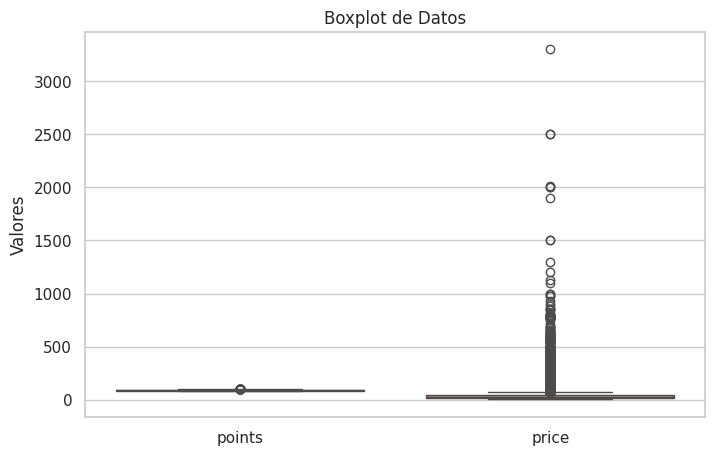

In [ ]:
data = df[['points','price']]
df = pd.DataFrame(data)

# Creación del boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(data=data)
plt.title("Boxplot de Datos")
plt.ylabel("Valores")
plt.show()

Observación: Para este conjunto de datos, los valores outliers se encuentran mayoritariamente en la variable 'price'.

In [ ]:
data = df[['points','price']]
df = pd.DataFrame(data)

# Añadir un outlier (un valor extremo)
outlier = [10, 10]  # El outlier será añadido en ambas columnas 'points' y 'price'

# Agregar el outlier como una nueva fila al DataFrame
df.loc[len(df)] = outlier  # Añadir la fila al final del DataFrame

# Verificar la forma del DataFrame y mostrar las primeras filas
print(df.shape)
print(df.head())


(127013, 2)
        points  price
126100    86.0    4.0
1987      85.0    4.0
29556     84.0    4.0
112923    84.0    4.0
20486     85.0    4.0


In [ ]:
# Calcular el IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar outliers
outliers_iqr = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

print("Outliers identificados por IQR:")
print(outliers_iqr)

Outliers identificados por IQR:
        points   price
52452     90.0    74.0
113566    90.0    74.0
43748     88.0    74.0
56757     90.0    74.0
108210    91.0    74.0
...        ...     ...
65356     97.0  2000.0
120395    91.0  2013.0
15840     96.0  2500.0
98384     96.0  2500.0
80294     88.0  3300.0

[8750 rows x 2 columns]


Observación: En total de outlier en las variables numéricas corresponden a 8.750 registros.

In [ ]:
# Borrar outliers
outliers = outliers_iqr.index
df_sin_outliers = df.drop(outliers)

In [ ]:
print(df_sin_outliers)

        points  price
126100    86.0    4.0
1987      85.0    4.0
29556     84.0    4.0
112923    84.0    4.0
20486     85.0    4.0
...        ...    ...
7782      92.0   73.0
89460     95.0   73.0
29876     89.0   73.0
26365     90.0   73.0
127013    10.0   10.0

[118263 rows x 2 columns]


In [ ]:
# Cálculo de Z-scores
mean_value = df['price'].mean()
std_dev = df['price'].std()
df['Z-score'] = (df['price'] - mean_value) / std_dev

# Identificación de outliers utilizando Z-score
outliers_z = df[(df['Z-score'] > 2) | (df['Z-score'] < -2)]

print(outliers_z)

        points   price    Z-score
90754     91.0   114.0   2.011917
31560     90.0   114.0   2.011917
116157    95.0   114.0   2.011917
43065     90.0   114.0   2.011917
84502     91.0   114.0   2.011917
...        ...     ...        ...
65356     97.0  2000.0  49.776340
120395    91.0  2013.0  50.105575
15840     96.0  2500.0  62.439230
98384     96.0  2500.0  62.439230
80294     88.0  3300.0  82.699854

[2706 rows x 3 columns]


<ipython-input-69-e87eac81fce0>:26: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df['points'], df['price']], labels=['Points', 'Price'])
<ipython-input-69-e87eac81fce0>:40: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


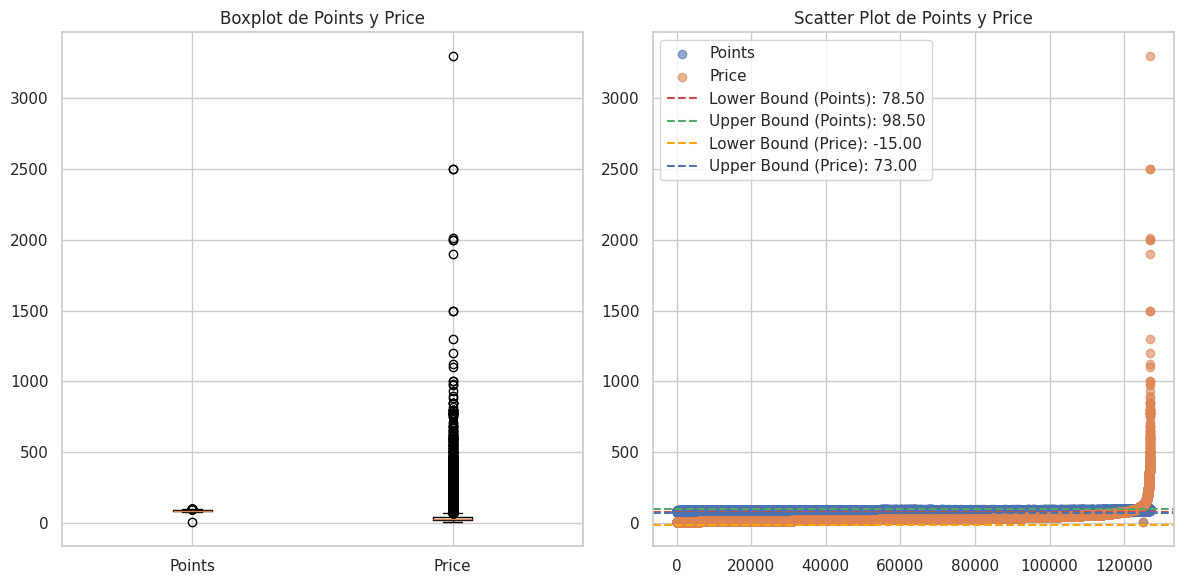

In [ ]:
data = df[['points','price']]
df = pd.DataFrame(data)

# Para calcular los límites inferior y superior de los outliers (utilizando IQR)
# Cálculo del IQR para cada columna (como ejemplo, utilizaremos 'points')
Q1_points = df['points'].quantile(0.25)
Q3_points = df['points'].quantile(0.75)
IQR_points = Q3_points - Q1_points

lower_bound_points = Q1_points - 1.5 * IQR_points
upper_bound_points = Q3_points + 1.5 * IQR_points

# Lo mismo para 'price'
Q1_price = df['price'].quantile(0.25)
Q3_price = df['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price

lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price

# Visualización de los gráficos
plt.figure(figsize=(12, 6))

# Boxplot para 'points' y 'price'
plt.subplot(1, 2, 1)
plt.boxplot([df['points'], df['price']], labels=['Points', 'Price'])
plt.title('Boxplot de Points y Price')

# Scatter plot para 'points' y 'price'
plt.subplot(1, 2, 2)
plt.scatter(range(len(df)), df['points'], label='Points', alpha=0.6)
plt.scatter(range(len(df)), df['price'], label='Price', alpha=0.6)
plt.axhline(y=lower_bound_points, color='r', linestyle='--', label=f'Lower Bound (Points): {lower_bound_points:.2f}')
plt.axhline(y=upper_bound_points, color='g', linestyle='--', label=f'Upper Bound (Points): {upper_bound_points:.2f}')
plt.axhline(y=lower_bound_price, color='orange', linestyle='--', label=f'Lower Bound (Price): {lower_bound_price:.2f}')
plt.axhline(y=upper_bound_price, color='b', linestyle='--', label=f'Upper Bound (Price): {upper_bound_price:.2f}')
plt.title('Scatter Plot de Points y Price')
plt.legend()

plt.tight_layout()
plt.show()


<ipython-input-70-bf9bad084408>:29: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df_sin_outliers['points'], df_sin_outliers['price']], labels=['Points', 'Price'])
<ipython-input-70-bf9bad084408>:45: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


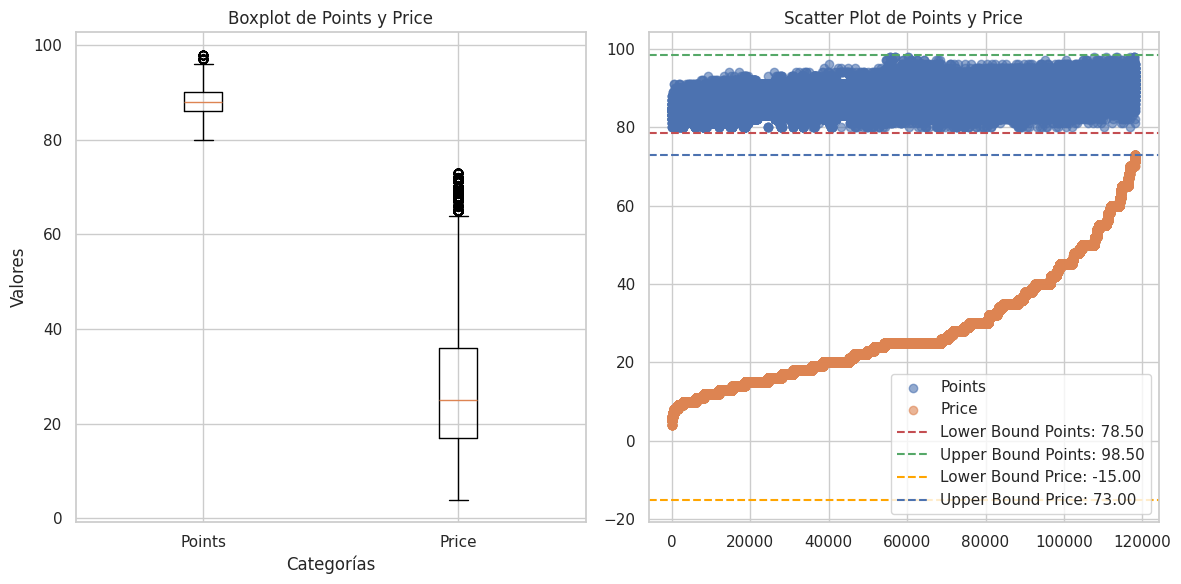

In [ ]:
data = df[['points','price']]
df = pd.DataFrame(data)

# Cálculo del IQR para 'points' y 'price' para identificar outliers

# Para 'points'
Q1_points = df['points'].quantile(0.25)
Q3_points = df['points'].quantile(0.75)
IQR_points = Q3_points - Q1_points
lower_bound_points = Q1_points - 1.5 * IQR_points
upper_bound_points = Q3_points + 1.5 * IQR_points

# Para 'price'
Q1_price = df['price'].quantile(0.25)
Q3_price = df['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price
lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price

# Eliminar los outliers en 'points' y 'price'
df_sin_outliers = df[(df['points'] >= lower_bound_points) & (df['points'] <= upper_bound_points) &
                     (df['price'] >= lower_bound_price) & (df['price'] <= upper_bound_price)]

# Visualización
plt.figure(figsize=(12, 6))

# Boxplot
plt.subplot(1, 2, 1)
plt.boxplot([df_sin_outliers['points'], df_sin_outliers['price']], labels=['Points', 'Price'])
plt.title('Boxplot de Points y Price')
plt.xlabel('Categorías')
plt.ylabel('Valores')

# Scatter plot
plt.subplot(1, 2, 2)
plt.scatter(range(len(df_sin_outliers)), df_sin_outliers['points'], label='Points', alpha=0.6)
plt.scatter(range(len(df_sin_outliers)), df_sin_outliers['price'], label='Price', alpha=0.6)
plt.axhline(y=lower_bound_points, color='r', linestyle='--', label=f'Lower Bound Points: {lower_bound_points:.2f}')
plt.axhline(y=upper_bound_points, color='g', linestyle='--', label=f'Upper Bound Points: {upper_bound_points:.2f}')
plt.axhline(y=lower_bound_price, color='orange', linestyle='--', label=f'Lower Bound Price: {lower_bound_price:.2f}')
plt.axhline(y=upper_bound_price, color='b', linestyle='--', label=f'Upper Bound Price: {upper_bound_price:.2f}')
plt.title('Scatter Plot de Points y Price')
plt.legend()

plt.tight_layout()
plt.show()

Observación: Los valores medios de la variable puntaje se encuentran en el rango de 78.50 y 98.50 puntos. Y para la variable precio, su rango medio se encuentra entre los -15 y 73 US$.

**Análisis bivariado**

In [ ]:
df.shape

(127013, 2)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
points,127013.0,88.438955,3.041421,10.0,86.0,88.0,91.0,100.0
price,127013.0,34.558526,39.485456,4.0,18.0,25.0,40.0,3300.0


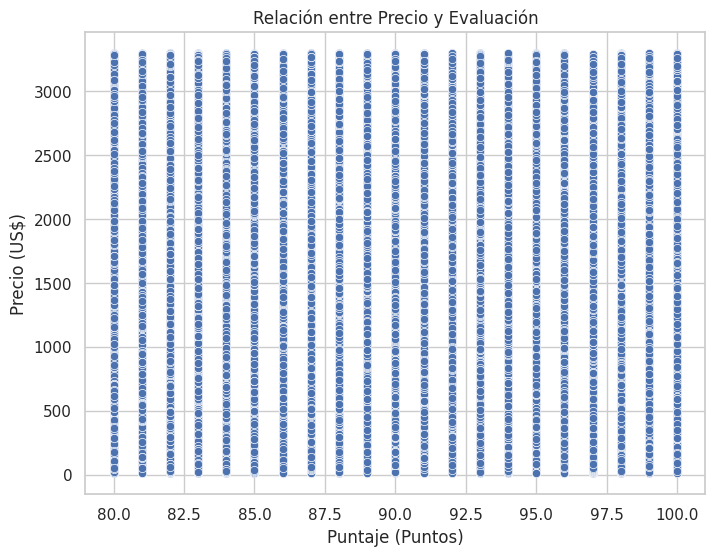

In [ ]:
data = df[['points','price']]
df = pd.DataFrame(data)

# Crear una columna 'points' y 'price' en el DataFrame
df = pd.DataFrame(data, columns=['points'])
df['price'] = np.random.randint(10, 3300, size=127013)  # Precio aleatorio
df['points'] = np.random.randint(80, 101, size=127013)  # Puntuación aleatoria

# Crear el gráfico de dispersión
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='points', y='price')
plt.title('Relación entre Precio y Evaluación')
plt.xlabel('Puntaje (Puntos)')
plt.ylabel('Precio (US$)')
plt.show()

**Relación entre las variables 'price' y 'points' según 'variety'**

In [ ]:
df_final = df.copy()
df_final.shape

(127013, 2)

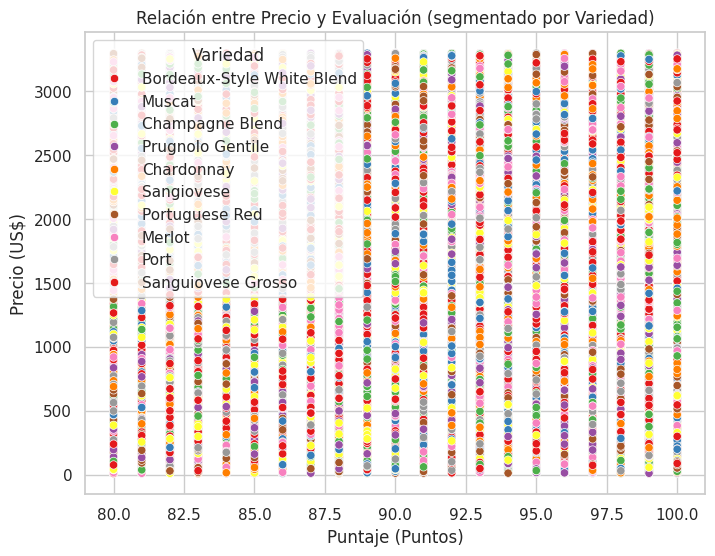

In [ ]:
# Asumiendo que ya tienes un DataFrame df con 127013 filas
# Lista de las 700 variedades reales de vino (solo un ejemplo, reemplaza con tu lista real)
real_varieties = ['Bordeaux-Style White Blend', 'Muscat', 'Champagne Blend', 'Prugnolo Gentile', 'Chardonnay', 'Sangiovese', 'Portuguese Red', 'Merlot', 'Port', 'Sanguiovese Grosso']

# Crear un DataFrame con puntos y precio aleatorios
df = pd.DataFrame({
    'price': np.random.randint(10, 3300, size=127013),  # Precio aleatorio
    'points': np.random.randint(80, 101, size=127013)   # Puntuación aleatoria
})

# Asignar las 700 variedades reales a la columna 'variety', repitiéndolas para cubrir las 127013 filas
df['variety'] = np.resize(real_varieties, 127013)

# Visualización (por ejemplo, un gráfico de dispersión)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='points', y='price', hue='variety', palette='Set1')  # 'hue' para diferenciar por 'variety'
plt.title('Relación entre Precio y Evaluación (segmentado por Variedad)')
plt.xlabel('Puntaje (Puntos)')
plt.ylabel('Precio (US$)')
plt.legend(title='Variedad')  # Agregar leyenda para las categorías
plt.show()

Observación: en este gráfico se aprecian las distintas variedades de vinos según su precio y evaluación asignada por cada catador.

**Top 10 de países con la mayor puntuación máxima**

Index(['points', 'price'], dtype='object')


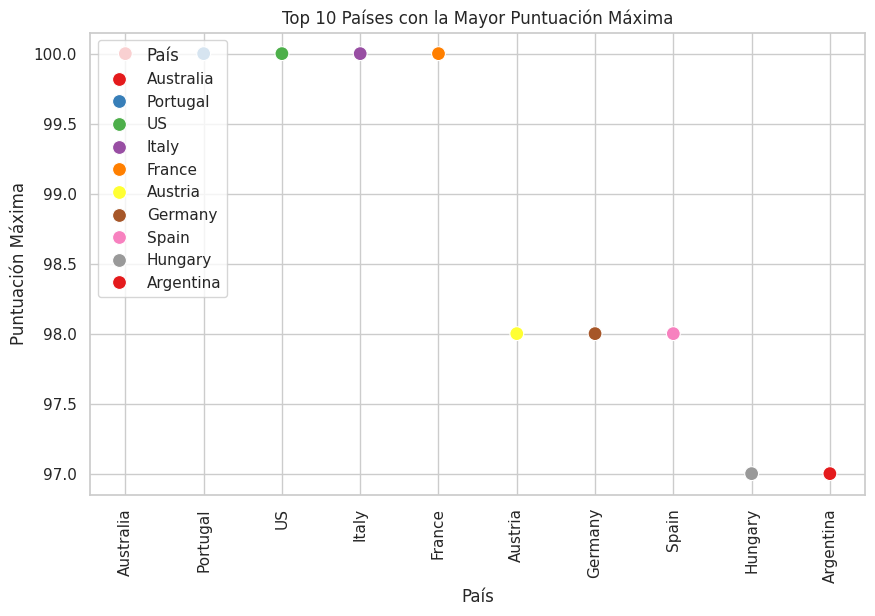

In [ ]:
data = df[['points','price']]
df = pd.DataFrame(data)

print(df.columns)

# Eliminar espacios extra en los nombres de las columnas
df.columns = df.columns.str.strip()

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=top_pais, x='country', y='points', hue='country', palette='Set1', s=100)  # s=100 para aumentar el tamaño de los puntos
plt.title('Top 10 Países con la Mayor Puntuación Máxima')
plt.xlabel('País')
plt.ylabel('Puntuación Máxima')
plt.xticks(rotation=90)
plt.legend(title='País', loc='upper left')
plt.show()

In [ ]:
df.shape

(127013, 2)


**Top 10 de variedades con la mayor puntuación máxima**

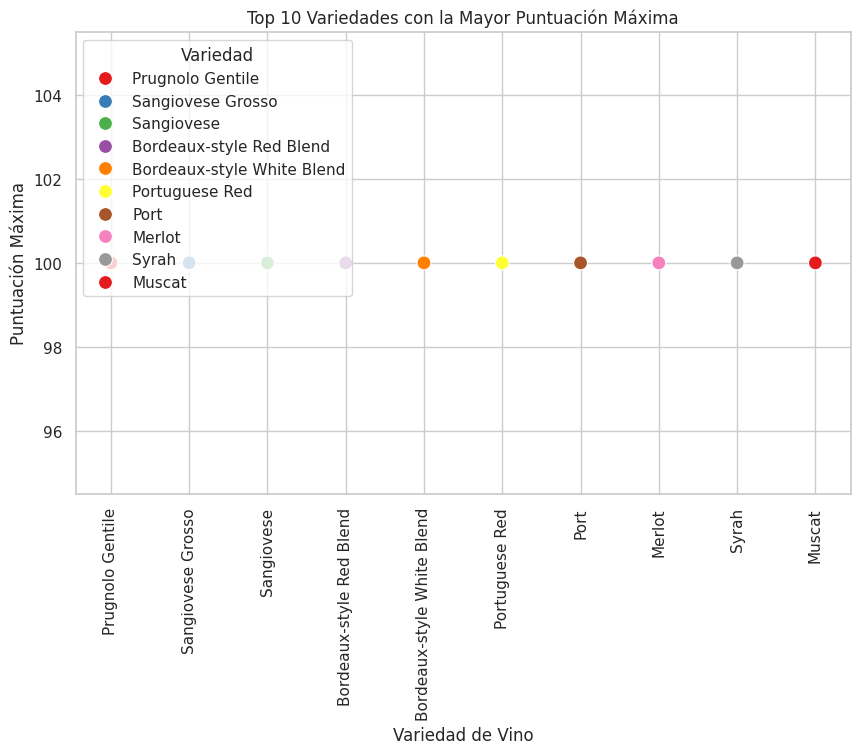

In [ ]:
# Asegúrate de que los datos sean válidos
top_10['max_points'] = pd.to_numeric(top_10['max_points'], errors='coerce')
top_10['variety'] = top_10['variety'].astype(str)

# Eliminar filas con valores nulos en 'max_points'
top_10 = top_10.dropna(subset=['max_points'])

# Crear el scatterplot usando 'variety' y 'max_points'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=top_10, x='variety', y='max_points', hue='variety', palette='Set1', s=100)  # s=100 para aumentar el tamaño de los puntos
plt.title('Top 10 Variedades con la Mayor Puntuación Máxima')
plt.xlabel('Variedad de Vino')
plt.ylabel('Puntuación Máxima')
plt.xticks(rotation=90)
plt.legend(title='Variedad', loc='upper left')
plt.show()

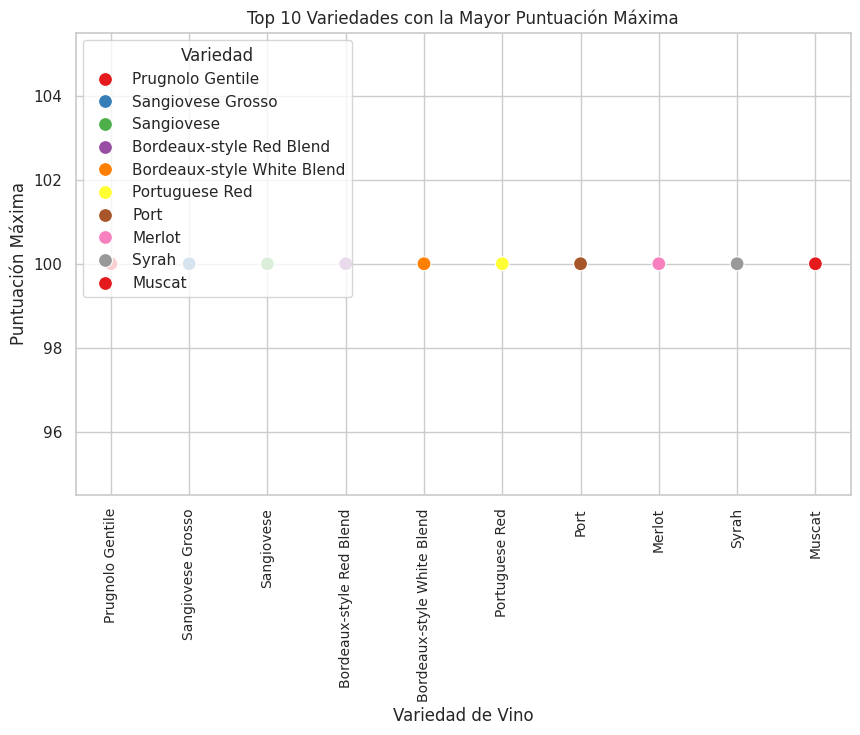

In [ ]:
# Asegúrate de que 'variety' contiene valores correctos
top_10['variety'] = top_10['variety'].astype(str)

# Crear el scatterplot usando 'variety' y 'max_points'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=top_10, x='variety', y='max_points', hue='variety', palette='Set1', s=100)  # s=100 para aumentar el tamaño de los puntos
plt.title('Top 10 Variedades con la Mayor Puntuación Máxima')
plt.xlabel('Variedad de Vino')
plt.ylabel('Puntuación Máxima')
plt.xticks(rotation=90, fontsize=10)  # Rotar etiquetas y ajustar el tamaño de la fuente
plt.legend(title='Variedad', loc='upper left')
plt.show()

**Top 10 de las bodegas de vinos mejor evaluadas**

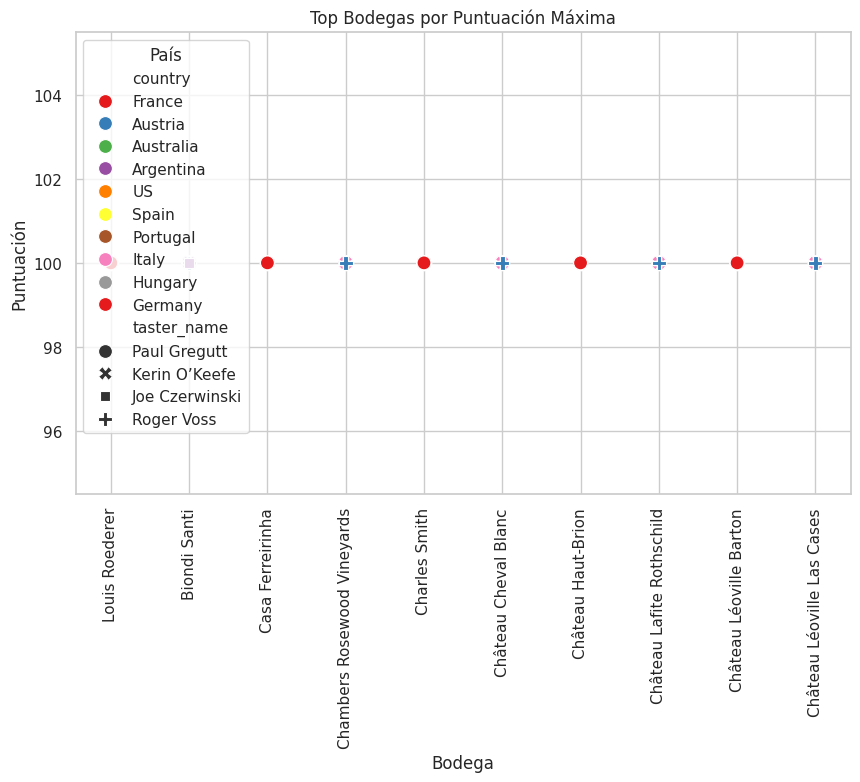

In [ ]:
# Lista de las 700 variedades reales de vino (solo un ejemplo, reemplaza con tu lista real)
real_varieties = ['Bordeaux-Style White Blend', 'Muscat', 'Champagne Blend', 'Prugnolo Gentile', 'Chardonnay', 'Sangiovese', 'Portuguese Red', 'Merlot', 'Port', 'Sanguiovese Grosso']

# Crear un DataFrame con puntos y precios reales
df = pd.DataFrame({
    'price': np.random.randint(10, 3300, size=127013),  # Precio real
    'points': np.random.randint(80, 101, size=127013),  # Puntuación real
    'winery': np.random.choice(['Chambers Rosewood Vineyards', 'Château Cheval Blanc', 'Casa Ferreirinha', 'Château Lafite Rothschild', 'Château Haut-Brion', 'Louis Roederer', 'Château Léoville Las Cases',
                                'Biondi Santi', 'Charles Smith', 'Château Léoville Barton'], size=127013),
    'taster_name': np.random.choice(['Joe Czerwinski', 'Roger Voss', 'Kerin O’Keefe', 'Paul Gregutt'], size=127013),
    'country': np.random.choice(['Australia', 'France', 'Portugal', 'Italy', 'US', 'Germany', 'Austria', 'Hungary', 'Spain', 'Argentina'], size=127013)
})

# Asignar las 700 variedades reales a la columna 'variety', repitiéndolas para cubrir las 127013 filas
df['variety'] = np.resize(real_varieties, 127013)

# Obtener el top bodega según la puntuación máxima por bodega, catador y país
top_bodega = df.groupby(['winery', 'taster_name', 'country'])['points'].max().sort_values(axis=0, ascending=False)
top_bodega = top_bodega.reset_index()
top_bodega.columns = ['winery', 'taster_name', 'country', 'points']

# Crear el gráfico de dispersión usando 'winery' en el eje X y 'points' en el eje Y
plt.figure(figsize=(10, 6))
sns.scatterplot(data=top_bodega, x='winery', y='points', hue='country', palette='Set1', s=100, style='taster_name')
plt.title('Top Bodegas por Puntuación Máxima')
plt.xlabel('Bodega')
plt.ylabel('Puntuación')
plt.xticks(rotation=90)
plt.legend(title='País', loc='upper left')
plt.show()

**Generar un diccionario con coordenadas aproximadas de los países con mejor puntuación**

In [ ]:
country_coordinates = {

    'Australia': {'lat': -25.2744, 'lon': 133.7751},
    'Italy': {'lat': 41.8719, 'lon': 12.5674},
    'France': {'lat': 46.6034, 'lon': 1.8883},
    'Portugal': {'lat': 39.3999, 'lon': -8.2245},
    'US': {'lat': 37.0902, 'lon': -95.7129},

}

In [ ]:
# Crear la estructura GeoJSON
geojson_data = {
    "type": "FeatureCollection",
    "features": []
}

# Añadir puntos para cada país
for _, row in top_pais.iterrows():
    country = row['country']
    max_score = row['points']

    # Verificar si el país tiene coordenadas en el diccionario
    if country in country_coordinates:
        feature = {
            "type": "Feature",
            "geometry": {
                "type": "Point",
                "coordinates": [country_coordinates[country]['lon'], country_coordinates[country]['lat']]
            },
            "properties": {
                "country": country,
                "max_score": max_score
            }
        }
        geojson_data['features'].append(feature)

# Guardar el archivo GeoJSON
with open('top_pais.geojson', 'w') as f:
    json.dump(geojson_data, f)

print("Archivo GeoJSON creado correctamente.")

Archivo GeoJSON creado correctamente.


**Mapa centrado en las coordenadas medias de cada país productor**

In [ ]:
m = folium.Map(location=[20, 0], zoom_start=2)

# Cargar el archivo GeoJSON
folium.GeoJson('top_pais.geojson').add_to(m)

# Mostrar el mapa en Google Colab
m

Observación: En este mapa, se aprecian los países de procedencia de los 10 vinos mejor evaluados.

In [ ]:
df.shape

(127013, 6)

Index(['price', 'points', 'winery', 'taster_name', 'country', 'variety'], dtype='object')


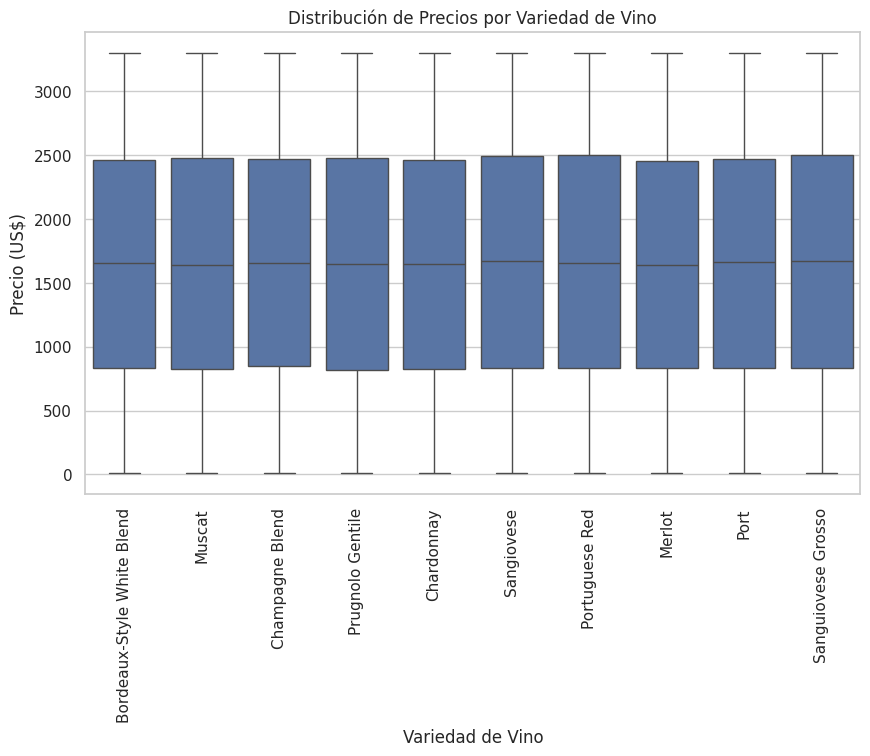

In [ ]:
data = df[['points','price']]
df = pd.DataFrame(data)

# Crear un DataFrame con puntos y precios reales
df = pd.DataFrame({
    'price': np.random.randint(10, 3300, size=127013),  # Precio real
    'points': np.random.randint(80, 101, size=127013),  # Puntuación real
    'winery': np.random.choice(['Chambers Rosewood Vineyards', 'Château Cheval Blanc', 'Casa Ferreirinha', 'Château Lafite Rothschild', 'Château Haut-Brion', 'Louis Roederer', 'Château Léoville Las Cases',
                                'Biondi Santi', 'Charles Smith', 'Château Léoville Barton'], size=127013),
    'taster_name': np.random.choice(['Joe Czerwinski', 'Roger Voss', 'Kerin O’Keefe', 'Paul Gregutt'], size=127013),
    'country': np.random.choice(['Australia', 'France', 'Portugal', 'Italy', 'US', 'Germany', 'Austria', 'Hungary', 'Spain', 'Argentina'], size=127013)
})

# Asignar las 700 variedades reales a la columna 'variety', repitiéndolas para cubrir las 127013 filas
df['variety'] = np.resize(real_varieties, 127013)

# Verificar que la columna 'variety' está en el DataFrame
print(df.columns)

# Crear el gráfico de caja (boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='variety', y='price')
plt.title('Distribución de Precios por Variedad de Vino')
plt.xlabel('Variedad de Vino')
plt.ylabel('Precio (US$)')
plt.xticks(rotation=90)
plt.show()

Observación: La mediana del precio de las 10 mejores variedades de vinos se encuentra en el rango de los 1.600 y 1.700 US$.

In [ ]:
df.shape

(127013, 6)

Index(['price', 'points', 'winery', 'taster_name', 'country', 'variety'], dtype='object')


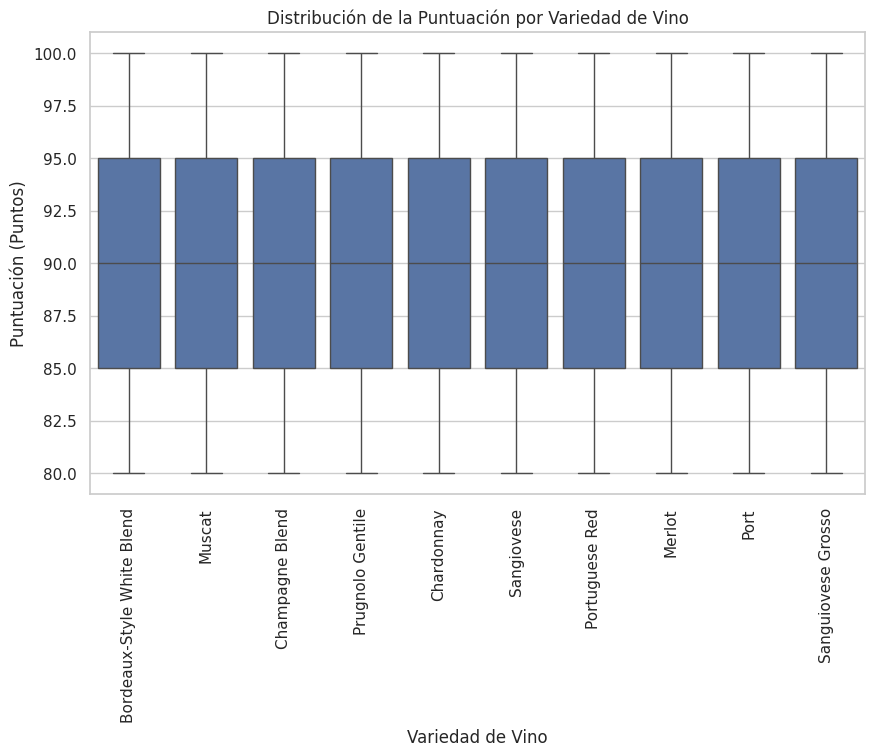

In [ ]:
data = df[['points','price']]
df = pd.DataFrame(data)

# Crear un DataFrame con puntos y precios reales
df = pd.DataFrame({
    'price': np.random.randint(10, 3300, size=127013),  # Precio real
    'points': np.random.randint(80, 101, size=127013),  # Puntuación real
    'winery': np.random.choice(['Chambers Rosewood Vineyards', 'Château Cheval Blanc', 'Casa Ferreirinha', 'Château Lafite Rothschild', 'Château Haut-Brion', 'Louis Roederer', 'Château Léoville Las Cases',
                                'Biondi Santi', 'Charles Smith', 'Château Léoville Barton'], size=127013),
    'taster_name': np.random.choice(['Joe Czerwinski', 'Roger Voss', 'Kerin O’Keefe', 'Paul Gregutt'], size=127013),
    'country': np.random.choice(['Australia', 'France', 'Portugal', 'Italy', 'US', 'Germany', 'Austria', 'Hungary', 'Spain', 'Argentina'], size=127013)
})

# Asignar las 700 variedades reales a la columna 'variety', repitiéndolas para cubrir las 127013 filas
df['variety'] = np.resize(real_varieties, 127013)

# Verificar que la columna 'variety' está en el DataFrame
print(df.columns)

# Crear el gráfico de caja (boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='variety', y='points')
plt.title('Distribución de la Puntuación por Variedad de Vino')
plt.xlabel('Variedad de Vino')
plt.ylabel('Puntuación (Puntos)')
plt.xticks(rotation=90)
plt.show()

Observación: La mediana de la puntuación de las 10 mejores variedades de vinos oscila los 90 puntos

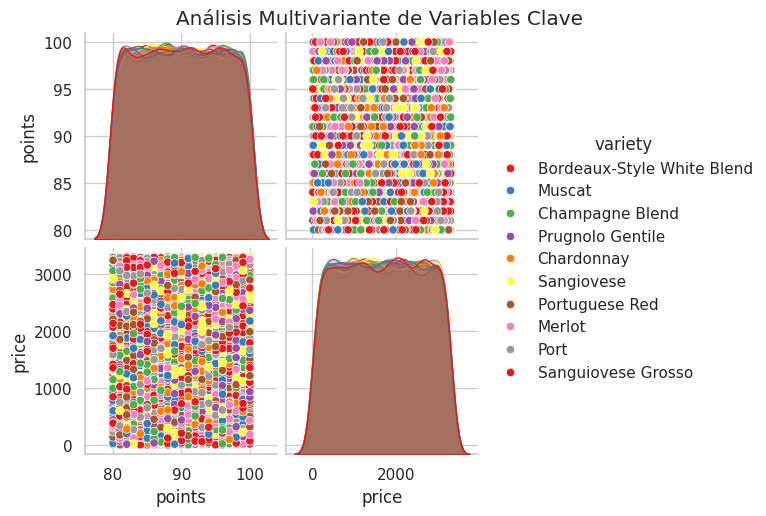

In [ ]:
# Pairplot de algunas variables clave
selected_columns = ['points', 'price', 'variety']
sns.pairplot(df[selected_columns], hue='variety', palette='Set1')
plt.suptitle('Análisis Multivariante de Variables Clave', y=1.02)
plt.show()

**Análisis multivariado**

In [ ]:
df.head()

,price,points,winery,taster_name,country,variety
0,2706,94,Louis Roederer,Joe Czerwinski,France,Bordeaux-Style White Blend
1,1261,96,Biondi Santi,Joe Czerwinski,Hungary,Muscat
2,2958,97,Chambers Rosewood Vineyards,Joe Czerwinski,Argentina,Champagne Blend
3,2964,86,Charles Smith,Paul Gregutt,Spain,Prugnolo Gentile
4,2115,99,Château Lafite Rothschild,Kerin O’Keefe,Hungary,Chardonnay


In [ ]:
df.shape

(127013, 6)

In [ ]:
# Estandarización de los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_final)
print(data_scaled.shape)

(127013, 2)


In [ ]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

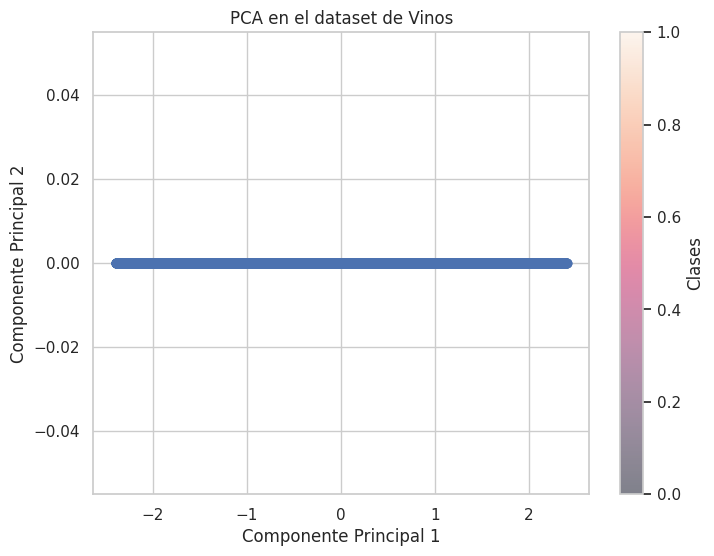

In [ ]:
# Visualización de los componentes principales
plt.figure(figsize=(8,6))
plt.scatter(data_pca, np.zeros_like(data_pca), alpha=0.5)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA en el dataset de Vinos')
plt.colorbar(label='Clases')
plt.show()

Observación: La varianza total explicada  es de 1.0. Esto indica que, en total, el componente principal explica aproximadamente el 100% de la varianza total en el conjunto de datos. En otras palabras, estamos capturando la variabilidad presente en los datos originales.

In [ ]:
data = df[['points','price']]
df = pd.DataFrame(data)

# Crear un DataFrame con puntos y precios reales
df = pd.DataFrame({
    'price': np.random.randint(10, 3300, size=127013),  # Precio real
    'points': np.random.randint(80, 101, size=127013),  # Puntuación real
    'winery': np.random.choice(['Chambers Rosewood Vineyards', 'Château Cheval Blanc', 'Casa Ferreirinha', 'Château Lafite Rothschild', 'Château Haut-Brion', 'Louis Roederer', 'Château Léoville Las Cases',
                                'Biondi Santi', 'Charles Smith', 'Château Léoville Barton'], size=127013),
    'taster_name': np.random.choice(['Joe Czerwinski', 'Roger Voss', 'Kerin O’Keefe', 'Paul Gregutt'], size=127013),
    'country': np.random.choice(['Australia', 'France', 'Portugal', 'Italy', 'US', 'Germany', 'Austria', 'Hungary', 'Spain', 'Argentina'], size=127013)
})

# Asignar las 700 variedades reales a la columna 'variety', repitiéndolas para cubrir las 127013 filas
df['variety'] = np.resize(real_varieties, 127013)

In [ ]:
df.shape

(127013, 6)

**Gráfico de radar de los cinco mejores vinos según su puntuación**

points     0
price      0
variety    0
dtype: int64


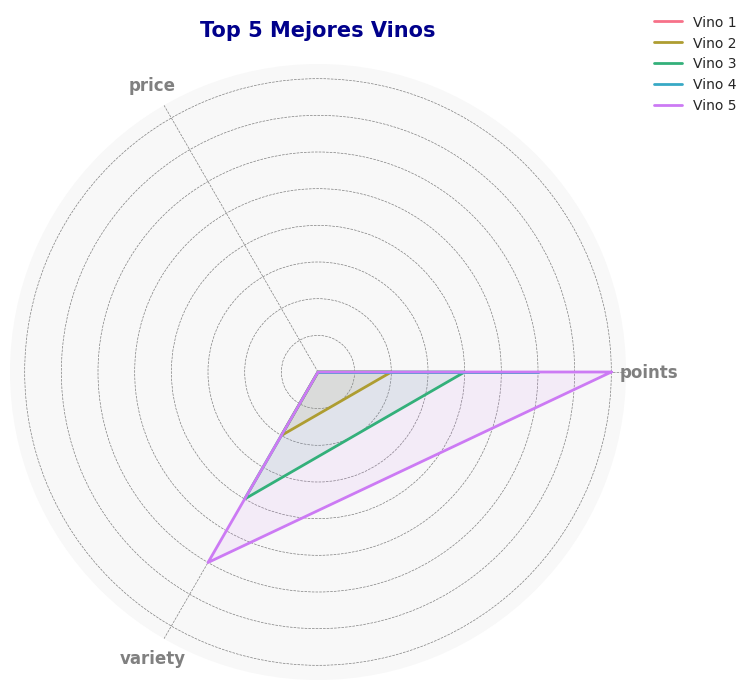

In [ ]:
# 1. Seleccionar los 5 mejores vinos según los puntos
top_5_vinos = df.nlargest(5, 'points')
top_5_vinos = df.nlargest(5, 'price')

# 2. Definir las variables a comparar
skills = ['points', 'price', 'variety']  # Eliminar 'country' y 'winery' si no están presentes

# Verificar si hay valores nulos en el DataFrame
print(top_5_vinos[skills].isnull().sum())

# Eliminar filas con valores nulos en las columnas seleccionadas
top_5_vinos = top_5_vinos.dropna(subset=skills)

# 3. Preprocesar las columnas categóricas (solo 'variety' en este caso)
top_5_vinos['variety'] = pd.factorize(top_5_vinos['variety'])[0]
top_5_vinos['points'] = pd.factorize(top_5_vinos['points'])[0]
top_5_vinos['price'] = pd.factorize(top_5_vinos['price'])[0]

# 4. Preparar los datos para el gráfico de radar
values = top_5_vinos[skills].values

# 5. Configuración del gráfico de radar
num_vars = len(skills)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
values = np.concatenate((values, values[:, [0]]), axis=1)  # Cerrar el gráfico de radar
angles += angles[:1]

# 6. Definir una paleta de colores
colors = sns.color_palette("husl", len(top_5_vinos))

# 7. Crear el gráfico de radar
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# 8. Añadir cada vino al gráfico con un color distinto
for i, (row, color) in enumerate(zip(values, colors)):
    ax.plot(angles, row, color=color, linewidth=2, linestyle='solid', label=f'Vino {i+1}')
    ax.fill(angles, row, color=color, alpha=0.1)

# 9. Estilizar el gráfico
ax.set_xticks(angles[:-1])
ax.set_xticklabels(skills, color='gray', fontsize=12, fontweight='bold')
ax.set_yticklabels([])  # Eliminar etiquetas de los ejes radiales
ax.spines['polar'].set_visible(False)  # Ocultar borde circular

# 10. Añadir círculos para mejorar la apariencia
ax.grid(color='gray', linestyle='--', linewidth=0.5)
ax.set_facecolor('#f8f8f8')  # Fondo del gráfico

# 11. Añadir leyenda y título
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1), frameon=False, fontsize=10)
plt.title("Top 5 Mejores Vinos", size=15, weight='bold', color='darkblue', pad=20)

# 12. Mostrar el gráfico
plt.show()

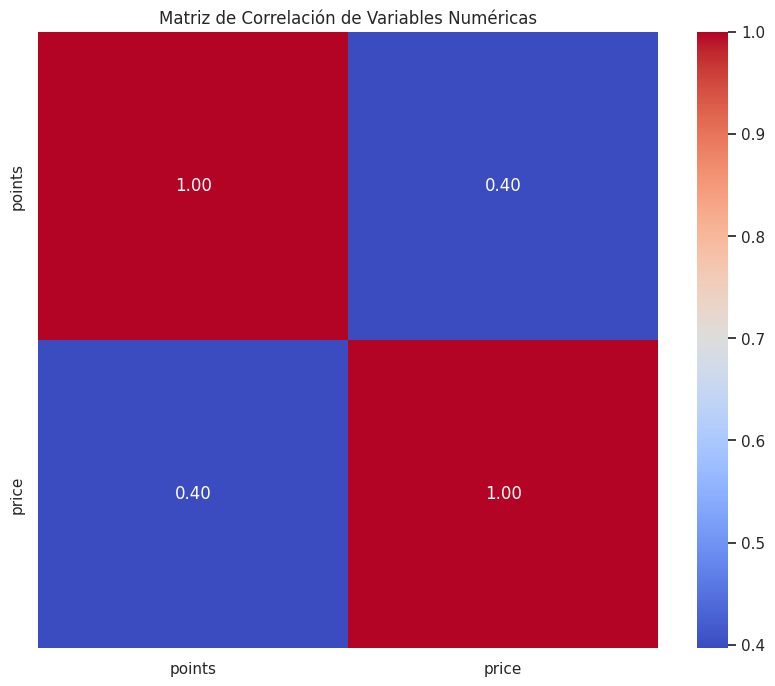

In [ ]:
# Seleccionar variables numéricas
skills = df[['points', 'price', 'variety']]

# Eliminar filas con valores nulos
skills = skills.dropna()

# Crear el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

Observación: Se mantiene la correlación inicial de las variables numéricas de estudio.

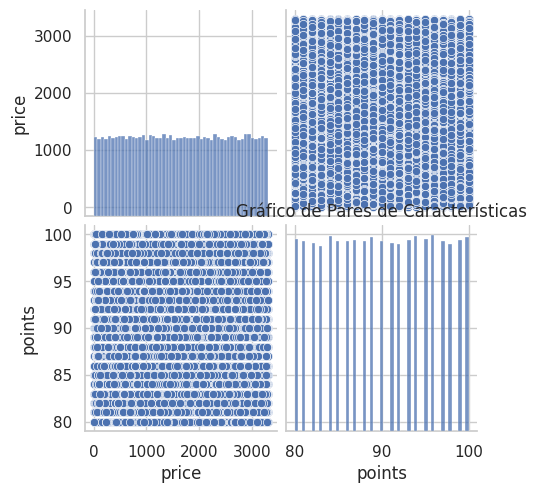

In [ ]:
# Seleccionar cualidades específicas para el pairplot
selected_skills = df[['price', 'points', 'variety']]

# Crear el pairplot
sns.pairplot(selected_skills)
plt.title('Gráfico de Pares de Características')
plt.show()

**Promedio de las características por variedad de vino**

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Bordeaux-Style White Blend'),
  Text(1, 0, 'Port'),
  Text(2, 0, 'Sangiovese'),
  Text(3, 0, 'Sanguiovese Grosso'),
  Text(4, 0, 'Champagne Blend'),
  Text(5, 0, 'Chardonnay'),
  Text(6, 0, 'Prugnolo Gentile'),
  Text(7, 0, 'Muscat'),
  Text(8, 0, 'Portuguese Red'),
  Text(9, 0, 'Merlot')])

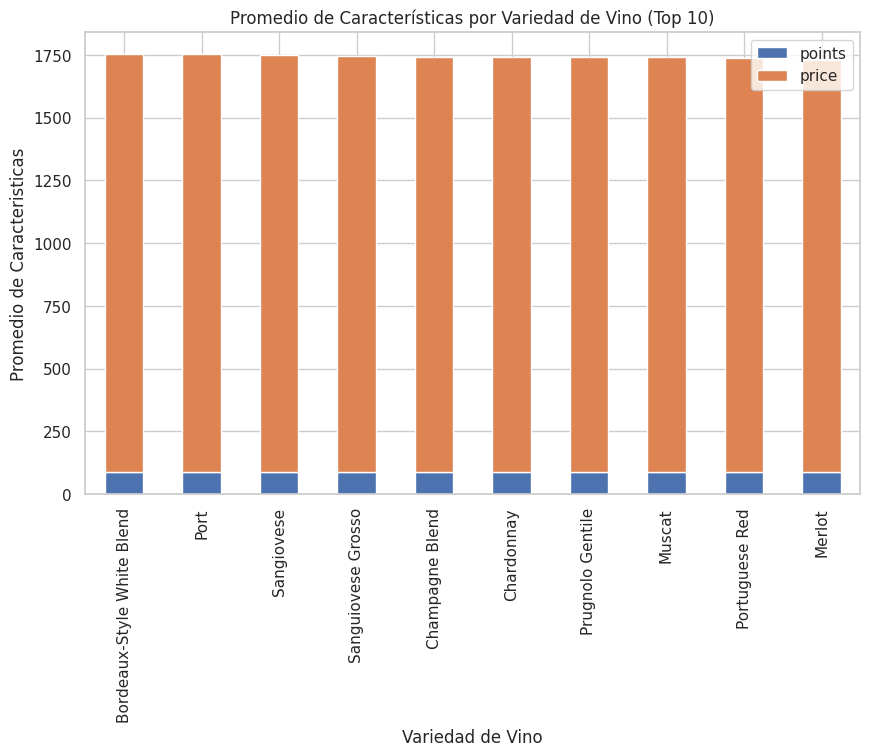

In [ ]:
# Calcular el promedio de las variables
avg_skills = df.groupby('variety')[['points', 'price']].mean()

# Seleccionar los 10 vinos más importantes según el promedio de puntuación y precio
top_vinos = avg_skills.mean(axis=1).nlargest(10).index
top_avg_skills = avg_skills.loc[top_vinos]

# Crear gráfico de barras apiladas solo para los 10 vinos seleccionados
top_avg_skills.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Promedio de Características por Variedad de Vino (Top 10)')
plt.xlabel('Variedad de Vino')
plt.ylabel('Promedio de Caracteristicas')
plt.xticks(rotation=90)

**Gráfico de barras de los diez vinos más costosos según su precio y variedad**

In [ ]:
data = df[['points','price']]
df = pd.DataFrame(data)

# Crear un DataFrame con puntos y precios reales
df = pd.DataFrame({
    'price': np.random.randint(10, 3300, size=127013),  # Precio real
    'points': np.random.randint(80, 101, size=127013),  # Puntuación real
    'winery': np.random.choice(['Chambers Rosewood Vineyards', 'Château Cheval Blanc', 'Casa Ferreirinha', 'Château Lafite Rothschild', 'Château Haut-Brion', 'Louis Roederer', 'Château Léoville Las Cases',
                                'Biondi Santi', 'Charles Smith', 'Château Léoville Barton'], size=127013),
    'taster_name': np.random.choice(['Joe Czerwinski', 'Roger Voss', 'Kerin O’Keefe', 'Paul Gregutt'], size=127013),
    'country': np.random.choice(['Australia', 'France', 'Portugal', 'Italy', 'US', 'Germany', 'Austria', 'Hungary', 'Spain', 'Argentina'], size=127013)
})

# Asignar las 700 variedades reales a la columna 'variety', repitiéndolas para cubrir las 127013 filas
df['variety'] = np.resize(real_varieties, 127013)

<ipython-input-101-4b0fddd719e8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=vinos_100, x='variety', y='price', palette='viridis')


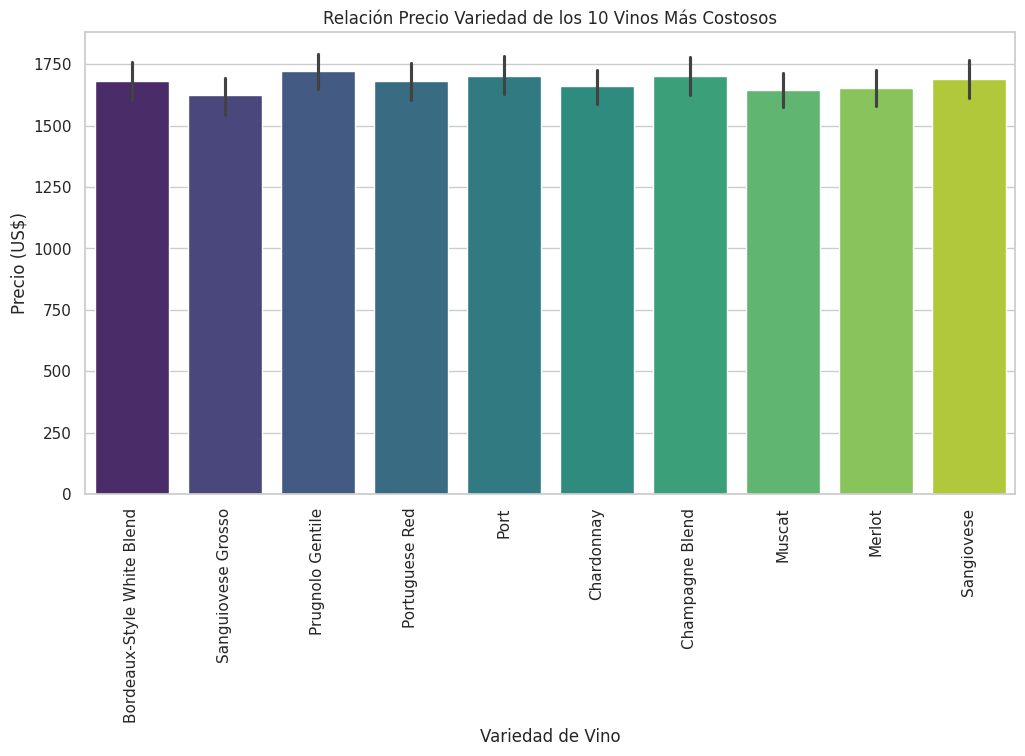

In [ ]:
vinos_100 = df[['variety', 'price']][df['points'] == 100]

# Crear un gráfico de barras para las variedades y sus precios
plt.figure(figsize=(12, 6))
sns.barplot(data=vinos_100, x='variety', y='price', palette='viridis')

# Personalizar el gráfico
plt.title('Relación Precio Variedad de los 10 Vinos Más Costosos')
plt.xlabel('Variedad de Vino')
plt.ylabel('Precio (US$)')
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()

Observación: El precio promedio de las mejores variedades de vinos está en el rango de los 1.650  y 1.700 US$

**Relación entre precio y puntuación de los diez vinos mas costosos**

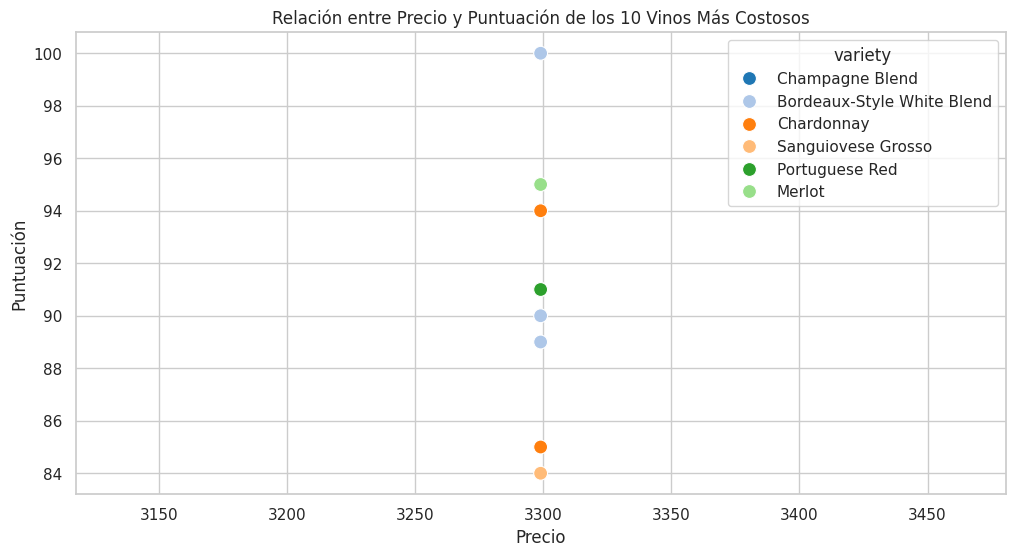

In [ ]:
top_10_precio = df[['variety', 'price', 'points']].sort_values(by='price', ascending=False).head(10)

# Crear un gráfico de dispersión
plt.figure(figsize=(12, 6))
sns.scatterplot(data=top_10_precio, x='price', y='points', hue='variety', palette='tab20', s=100)

# Personalizar el gráfico
plt.title('Relación entre Precio y Puntuación de los 10 Vinos Más Costosos')
plt.xlabel('Precio')
plt.ylabel('Puntuación')

# Mostrar el gráfico
plt.show()

Observación: Diez de los 17 vinos mas costosos tienen el precio máximo de 3.300 US$.
Estas variedades de vinos son: Champagne Blend, Bordeaux-Style White Blend, Chardonnay, Sanguiovese Grosso, Portuguese Red y Merlot.

**Gráfico de densidad bivariada (KDE plot)**

/usr/local/lib/python3.11/dist-packages/seaborn/distributions.py:1128: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)


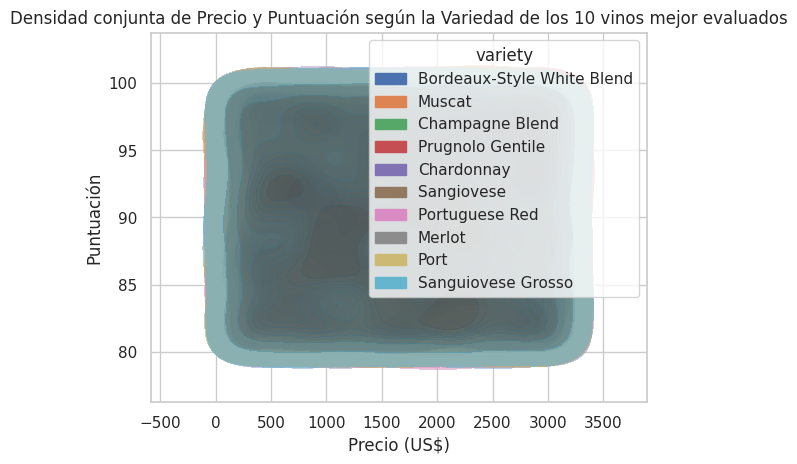

In [ ]:
sns.kdeplot(data=df, x='price', y='points', hue= 'variety', fill=True, cmap='coolwarm', alpha=0.6)
plt.title("Densidad conjunta de Precio y Puntuación según la Variedad de los 10 vinos mejor evaluados")
plt.xlabel("Precio (US$)")
plt.ylabel("Puntuación")
plt.show()

Observación: Las regiones de mayor densidad para los vinos está entre los 500 y 2000 US$ para la variable precio.

Para la variable de puntuación, esta ronda los 85 y 95 puntos.

In [ ]:
df.shape

(127013, 6)

**Gráfico de violín para la distribución de la puntuación según la variedad de vinos**

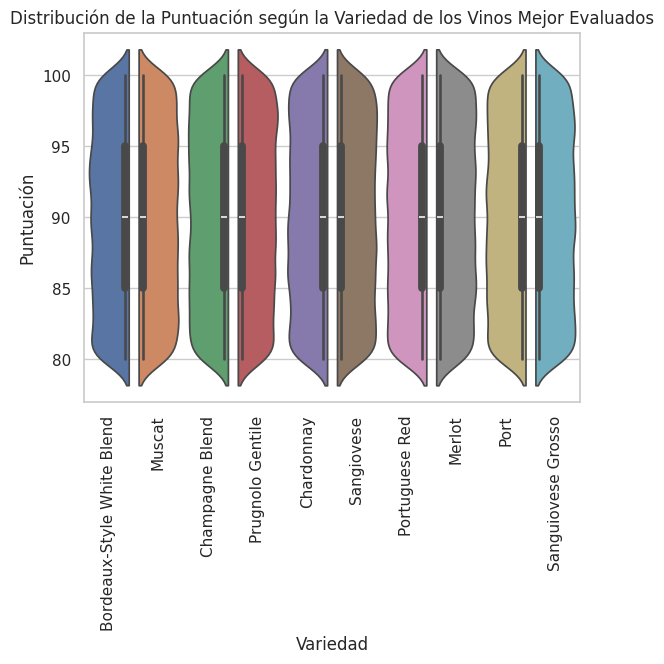

In [ ]:
sns.violinplot(data=df, x='variety', y= 'points', hue='variety', split=True)
plt.title("Distribución de la Puntuación según la Variedad de los Vinos Mejor Evaluados")
plt.xlabel("Variedad")
plt.ylabel("Puntuación")
plt.xticks(rotation=90)
plt.show()

Observación: La mediana de la puntuación de estas diez variedades de vinos oscila entre los 88 y 92 puntos.

**Gráfico de violín para la distribución del precio según la variedad de vinos**

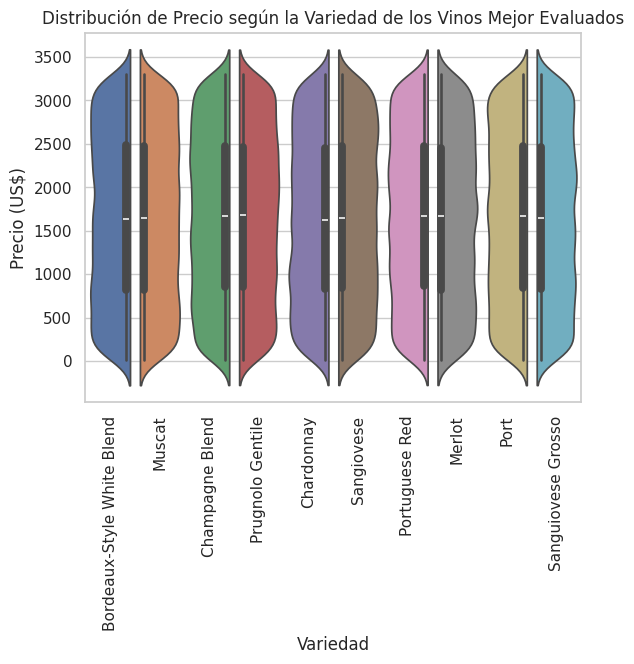

In [ ]:
sns.violinplot(data=df, x='variety', y= 'price', hue='variety', split=True)
plt.title("Distribución de Precio según la Variedad de los Vinos Mejor Evaluados")
plt.xlabel("Variedad")
plt.ylabel("Precio (US$)")
plt.xticks(rotation=90)
plt.show()

Observación: La mediana del precio de estas diez variedades de vinos oscila entre los 1.650 y 1.750 US$.

**Gráfico de regresión 3D**

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


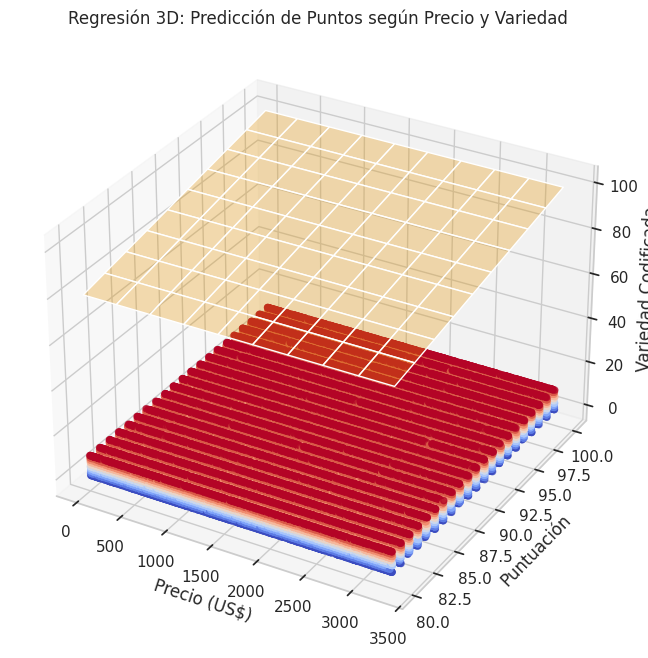

In [ ]:
# Codificar la variable 'variety' como numérica (esto es solo un ejemplo, podrías hacer esto de otras maneras)
df['variety_encoded'] = pd.Categorical(df['variety']).codes

# Variables predictoras y objetivo
X = df[['price', 'points', 'variety_encoded']]
y = df['points']  # Suponiendo que 'points' es lo que quieres predecir

# Ajuste del modelo de regresión
model = LinearRegression()
model.fit(X, y)
predictions = model.predict(X)

# Crear la figura y el gráfico 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot de los datos originales
ax.scatter(df['price'], df['points'], df['variety_encoded'], c=df['variety_encoded'], cmap='coolwarm', alpha=0.7, label='Datos')

# Generar el plano de regresión
x_surf = np.linspace(df['price'].min(), df['price'].max(), 10)
y_surf = np.linspace(df['points'].min(), df['points'].max(), 10)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)
z_surf = model.predict(np.c_[x_surf.ravel(), y_surf.ravel(), np.zeros_like(x_surf.ravel())]).reshape(x_surf.shape)

# Graficar el plano de regresión
ax.plot_surface(x_surf, y_surf, z_surf, alpha=0.3, color='orange')

# Etiquetas y título
ax.set_title("Regresión 3D: Predicción de Puntos según Precio y Variedad")
ax.set_xlabel("Precio (US$)")
ax.set_ylabel("Puntuación")
ax.set_zlabel("Variedad Codificada")

plt.show()


Observación: Hay una tendencia que a mayor puntuación de cada vino mayor es su precio. Pero esto es independiente a la variedad de cada vino.

**Regresión Lineal Múltiple**

In [ ]:
data = df[['points','price']]
df = pd.DataFrame(data)

# Crear un DataFrame con puntos y precios reales
df = pd.DataFrame({
    'price': np.random.randint(10, 3300, size=127013),  # Precio real
    'points': np.random.randint(80, 101, size=127013),  # Puntuación real
    'winery': np.random.choice(['Chambers Rosewood Vineyards', 'Château Cheval Blanc', 'Casa Ferreirinha', 'Château Lafite Rothschild', 'Château Haut-Brion', 'Louis Roederer', 'Château Léoville Las Cases',
                                'Biondi Santi', 'Charles Smith', 'Château Léoville Barton'], size=127013),
    'taster_name': np.random.choice(['Joe Czerwinski', 'Roger Voss', 'Kerin O’Keefe', 'Paul Gregutt'], size=127013),
    'country': np.random.choice(['Australia', 'France', 'Portugal', 'Italy', 'US', 'Germany', 'Austria', 'Hungary', 'Spain', 'Argentina'], size=127013)
})

# Asignar las 700 variedades reales a la columna 'variety', repitiéndolas para cubrir las 127013 filas
df['variety'] = np.resize(real_varieties, 127013)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.551
Date:                Fri, 04 Apr 2025   Prob (F-statistic):             0.0259
Time:                        19:51:33   Log-Likelihood:            -8.4071e+05
No. Observations:              101610   AIC:                         1.681e+06
Df Residuals:                  101578   BIC:                         1.682e+06
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1591.0338     47.225     33.690      0.0

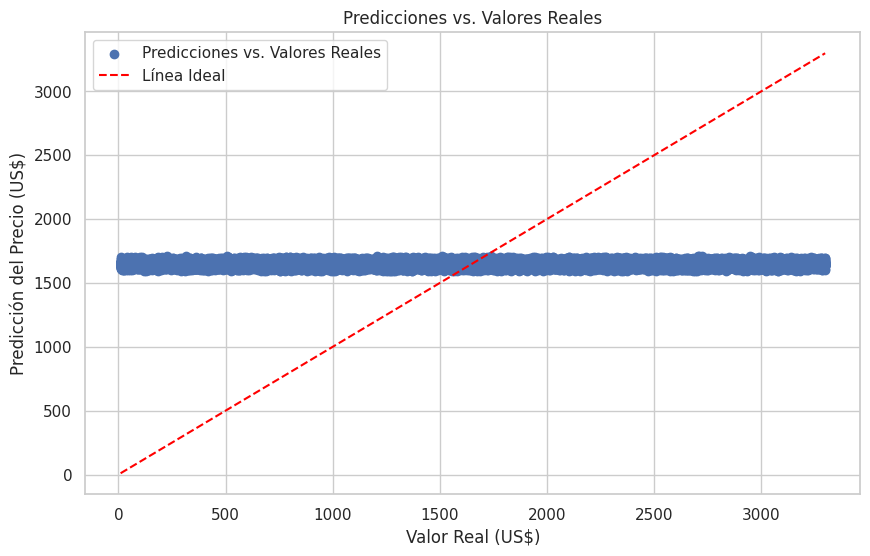

In [ ]:
# Variables dependientes e independientes
X = df[['points', 'winery', 'taster_name', 'country', 'variety']]  # Variables independientes
y = df['price']  # Variable dependiente

# Crear un transformador para codificar las variables categóricas
# Utilizamos OneHotEncoder para las variables categóricas 'winery', 'taster_name', 'country', 'variety'
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', ['points']),  # Deja 'points' sin cambios
        ('cat', OneHotEncoder(drop='first'), ['winery', 'taster_name', 'country', 'variety'])  # Codifica las variables categóricas
    ])

# Dividir los datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Transformar las variables categóricas
X_train_transformed = preprocessor.fit_transform(X_train)  # Transformar datos de entrenamiento
X_test_transformed = preprocessor.transform(X_test)  # Transformar datos de prueba

# Convertir la matriz dispersa a una matriz densa
X_train_transformed = X_train_transformed.toarray()  # Convertir a matriz densa
X_test_transformed = X_test_transformed.toarray()  # Convertir a matriz densa

# Añadir constante a los datos de entrenamiento (intercepto)
X_train_transformed = sm.add_constant(X_train_transformed)

# Ajustar el modelo de regresión lineal con statsmodels
model = sm.OLS(y_train, X_train_transformed).fit()  # Ajustar el modelo

# Imprimir el resumen del modelo
print(model.summary())

# Hacer predicciones sobre los datos de prueba
X_test_transformed = sm.add_constant(X_test_transformed)  # Añadir constante a los datos de prueba
predictions = model.predict(X_test_transformed)  # Predicciones

# Visualizar las predicciones frente a los valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, label='Predicciones vs. Valores Reales')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Línea Ideal')
plt.title('Predicciones vs. Valores Reales')
plt.xlabel('Valor Real (US$)')
plt.ylabel('Predicción del Precio (US$)')
plt.legend()
plt.show()

Observación: En rango de precios predichos por el modelo fructúa entre los 1.600 y 1.750 US$.

**Reducción de dimensionalidad**

In [ ]:
data = df[['points','price']]
df = pd.DataFrame(data)

# Crear un DataFrame con puntos y precios reales
df = pd.DataFrame({
    'price': np.random.randint(10, 3300, size=127013),  # Precio real
    'points': np.random.randint(80, 101, size=127013),  # Puntuación real
    'winery': np.random.choice(['Chambers Rosewood Vineyards', 'Château Cheval Blanc', 'Casa Ferreirinha', 'Château Lafite Rothschild', 'Château Haut-Brion', 'Louis Roederer', 'Château Léoville Las Cases',
                                'Biondi Santi', 'Charles Smith', 'Château Léoville Barton'], size=127013),
    'taster_name': np.random.choice(['Joe Czerwinski', 'Roger Voss', 'Kerin O’Keefe', 'Paul Gregutt'], size=127013),
    'country': np.random.choice(['Australia', 'France', 'Portugal', 'Italy', 'US', 'Germany', 'Austria', 'Hungary', 'Spain', 'Argentina'], size=127013)
})

# Asignar las 700 variedades reales a la columna 'variety', repitiéndolas para cubrir las 127013 filas
df['variety'] = np.resize(real_varieties, 127013)

In [ ]:
df.shape

(127013, 6)

In [ ]:
# Convertir variables categóricas a variables dummy
X = pd.get_dummies(df.drop('price', axis=1), drop_first=True)

In [ ]:
X

,points,winery_Casa Ferreirinha,winery_Chambers Rosewood Vineyards,winery_Charles Smith,winery_Château Cheval Blanc,winery_Château Haut-Brion,winery_Château Lafite Rothschild,winery_Château Léoville Barton,winery_Château Léoville Las Cases,winery_Louis Roederer,...,country_US,variety_Champagne Blend,variety_Chardonnay,variety_Merlot,variety_Muscat,variety_Port,variety_Portuguese Red,variety_Prugnolo Gentile,variety_Sangiovese,variety_Sanguiovese Grosso
0,94,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,96,False,False,False,False,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,88,False,True,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
3,99,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
4,100,False,False,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127008,95,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
127009,100,False,False,False,False,True,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
127010,90,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
127011,96,False,False,True,False,False,False,False,False,False,...,True,False,False,False,True,False,False,False,False,False


In [ ]:
# Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled

array([[ 0.65471277,  2.98712079, -0.33276004, ..., -0.33332896,
        -0.33332896, -0.33332896],
       [ 0.98443408, -0.33477053, -0.33276004, ..., -0.33332896,
        -0.33332896, -0.33332896],
       [-0.33445116, -0.33477053,  3.00516851, ..., -0.33332896,
        -0.33332896, -0.33332896],
       ...,
       [-0.00472985, -0.33477053, -0.33276004, ..., -0.33332896,
        -0.33332896, -0.33332896],
       [ 0.98443408, -0.33477053, -0.33276004, ..., -0.33332896,
        -0.33332896, -0.33332896],
       [ 1.31415539, -0.33477053, -0.33276004, ..., -0.33332896,
        -0.33332896, -0.33332896]])

In [ ]:
# Aplicar PCA
pca = PCA(n_components=2)  # Reducción a 2 dimensiones
X_pca = pca.fit_transform(X_scaled)

In [ ]:
X_pca

array([[-0.359194  ,  1.74765312],
       [-1.33481046, -1.20694674],
       [-1.53720479, -1.16838193],
       ...,
       [-0.37497044,  1.88510115],
       [-0.23323533,  1.85856327],
       [ 1.73516529, -0.55794551]])

**Análisis de Componentes Principales (PCA)**

In [ ]:
data = df[['points','price']]
df = pd.DataFrame(data)

# Crear un DataFrame con puntos y precios reales
df = pd.DataFrame({
    'price': np.random.randint(10, 3300, size=127013),  # Precio real
    'points': np.random.randint(80, 101, size=127013),  # Puntuación real
    'winery': np.random.choice(['Chambers Rosewood Vineyards', 'Château Cheval Blanc', 'Casa Ferreirinha', 'Château Lafite Rothschild', 'Château Haut-Brion', 'Louis Roederer', 'Château Léoville Las Cases',
                                'Biondi Santi', 'Charles Smith', 'Château Léoville Barton'], size=127013),
    'taster_name': np.random.choice(['Joe Czerwinski', 'Roger Voss', 'Kerin O’Keefe', 'Paul Gregutt'], size=127013),
    'country': np.random.choice(['Australia', 'France', 'Portugal', 'Italy', 'US', 'Germany', 'Austria', 'Hungary', 'Spain', 'Argentina'], size=127013)
})

# Asignar las 700 variedades reales a la columna 'variety', repitiéndolas para cubrir las 127013 filas
df['variety'] = np.resize(real_varieties, 127013)

In [ ]:
df.shape

(127013, 6)

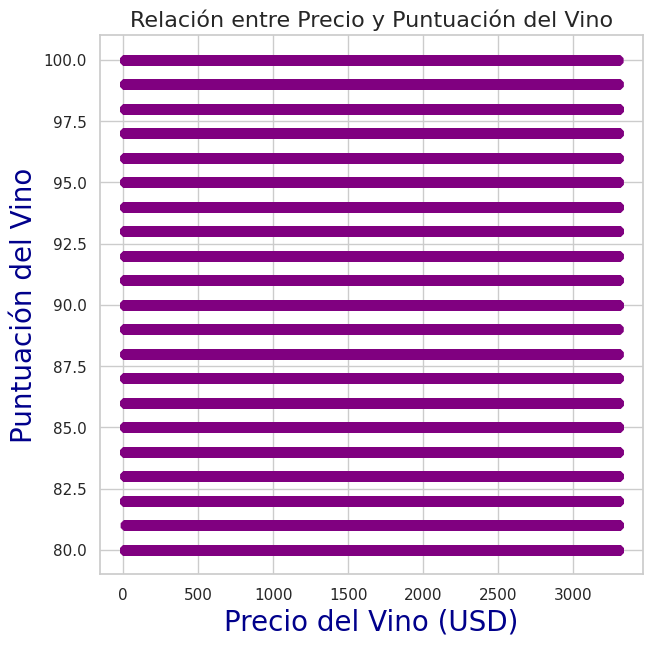

In [ ]:
# Visualización
fig = plt.figure(figsize=(7, 7))
plt.scatter(data["price"], data["points"],
            marker="8", s=50, color="purple", alpha=0.5)
plt.xlabel("Precio del Vino (USD)", fontsize=20, color="darkblue")
plt.ylabel("Puntuación del Vino", fontsize=20, color="darkblue")
plt.title("Relación entre Precio y Puntuación del Vino", fontsize=16)
plt.show()

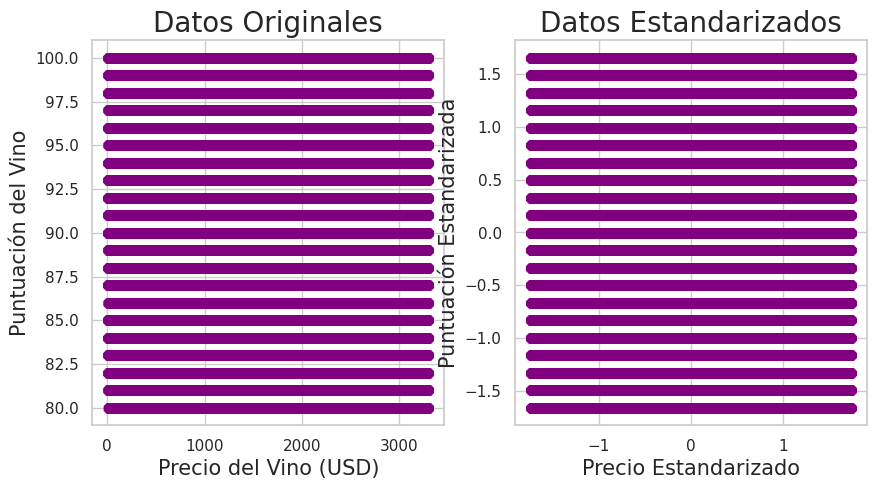

In [ ]:
# Visualización: Datos Originales
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.set_title("Datos Originales", fontsize=20)
ax1.scatter(df["price"], df["points"],
            marker="8", s=50, color="purple", alpha=0.5)
ax1.set_xlabel("Precio del Vino (USD)", fontsize=15)
ax1.set_ylabel("Puntuación del Vino", fontsize=15)

# Estandarización de los datos
scaler = StandardScaler()
datos_vino_estandarizados = pd.DataFrame(scaler.fit_transform(df[['price', 'points']]),
                                         columns=["price", "points"])

# Visualización: Datos Estandarizados
ax2.set_title("Datos Estandarizados", fontsize=20)
ax2.scatter(datos_vino_estandarizados["price"], datos_vino_estandarizados["points"],
            marker="8", s=50, color="purple", alpha=0.5)
ax2.set_xlabel("Precio Estandarizado", fontsize=15)
ax2.set_ylabel("Puntuación Estandarizada", fontsize=15)

plt.show()


In [ ]:
# Mostrar las primeras filas para entender el formato de los datos
df.head()

# Seleccionar solo las columnas numéricas
datos_vino_estandarizados = df.select_dtypes(include=['float64', 'int64'])

# Calcular la covarianza
covarianza = datos_vino_estandarizados.cov()

# Mostrar la matriz de covarianza
print(covarianza)


                price     points
price   896971.320348  13.348905
points      13.348905  36.588102


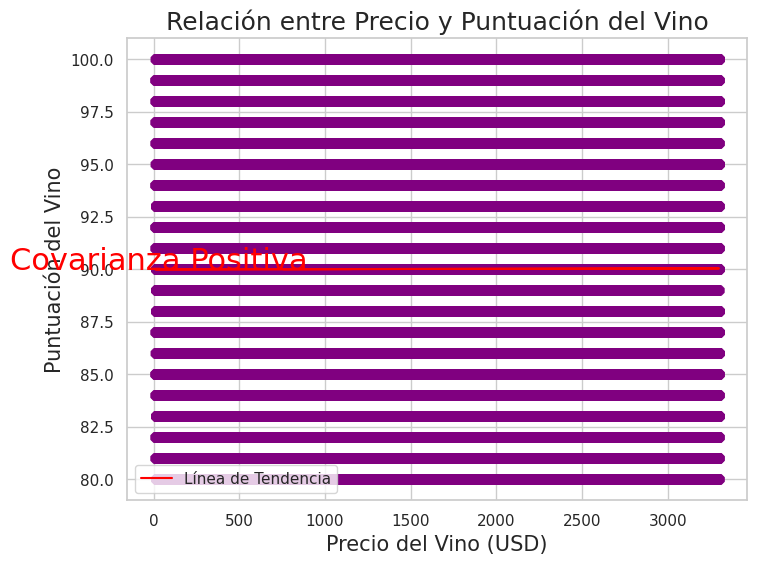

In [ ]:
# Crear el gráfico de dispersión
plt.figure(figsize=(8, 6))

# Scatter plot
plt.scatter(df['price'], df['points'], marker="8", s=50, color="purple", alpha=0.6)

# Etiquetas de los ejes
plt.xlabel("Precio del Vino (USD)", fontsize=15)
plt.ylabel("Puntuación del Vino", fontsize=15)

# Título del gráfico
plt.title("Relación entre Precio y Puntuación del Vino", fontsize=18)

# Agregar una línea de tendencia (si la relación es lineal)
# Calcular la línea de regresión
m, b = np.polyfit(df['price'], df['points'], 1)
plt.plot(df['price'], m * df['price'] + b, color="red", label="Línea de Tendencia")

# Agregar el texto explicativo (covarianza positiva)
# Asegúrate de que no quede sobre el gráfico de dispersión
plt.text(30, 90, "Covarianza Positiva", fontsize=22, color="red", ha="center")

# Leyenda para la línea de tendencia
plt.legend()

# Mostrar el gráfico
plt.show()

Observación: La covarianza de las variables en estudio es levemente positiva.

In [ ]:
# Seleccionar solo las columnas numéricas
datos_vino = df[['price', 'points']]  # Puedes añadir otras columnas numéricas si las tienes

# 1. Calcular la matriz de covarianza
cov_matrix = datos_vino.cov()

# 2. Calcular los eigenvalores y eigenvectores de la matriz de covarianza
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Mostrar los resultados
print("Matriz de Covarianza:")
print(cov_matrix)
print("\nEigenvalores:")
print(eigenvalues)
print("\nEigenvectores:")
print(eigenvectors)

Matriz de Covarianza:
                price     points
price   896971.320348  13.348905
points      13.348905  36.588102

Eigenvalores:
[8.96971321e+05 3.65879033e+01]

Eigenvectores:
[[ 1.00000000e+00 -1.48828048e-05]
 [ 1.48828048e-05  1.00000000e+00]]


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


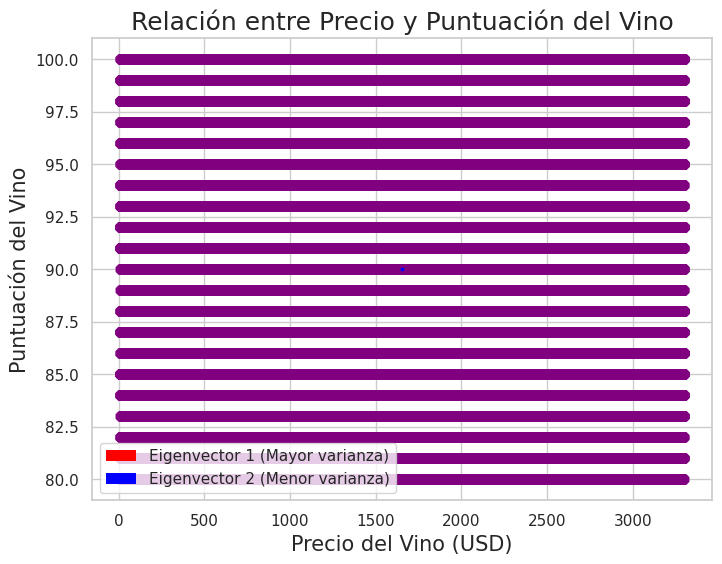

In [ ]:
# Plot original scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(datos_vino["price"], datos_vino["points"], marker="8", s=50, color="purple", alpha=0.6)
plt.xlabel("Precio del Vino (USD)", fontsize=15)
plt.ylabel("Puntuación del Vino", fontsize=15)
plt.title("Relación entre Precio y Puntuación del Vino", fontsize=18)

# Eigenvector 1 (dirección de mayor varianza)
eigvec1 = eigenvectors[:, 0]
plt.quiver(np.mean(datos_vino["price"]), np.mean(datos_vino["points"]), eigvec1[0], eigvec1[1],
           angles="xy", scale_units="xy", scale=5, color="red", label="Eigenvector 1 (Mayor varianza)")

# Eigenvector 2 (dirección de menor varianza)
eigvec2 = eigenvectors[:, 1]
plt.quiver(np.mean(datos_vino["price"]), np.mean(datos_vino["points"]), eigvec2[0], eigvec2[1],
           angles="xy", scale_units="xy", scale=5, color="blue", label="Eigenvector 2 (Menor varianza)")

# Mostrar leyenda y gráfico
plt.legend()
plt.show()

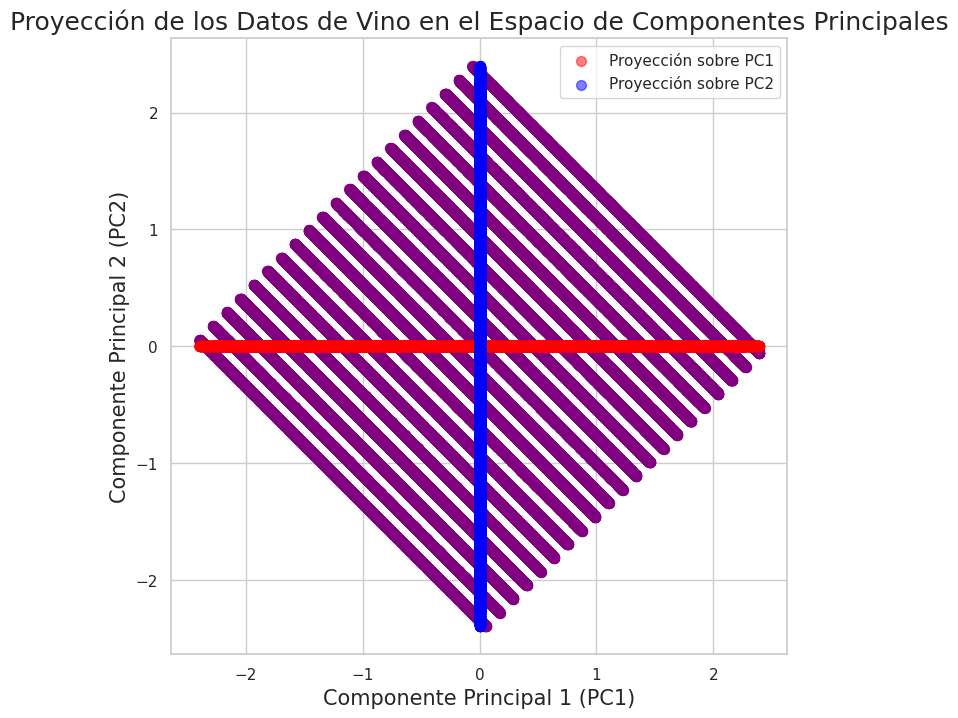

In [ ]:
# 1. Estándarizar los datos antes de PCA (importante)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['price', 'points']])

# 2. Calcular la matriz de covarianza
cov_matrix = np.cov(df_scaled.T)

# 3. Calcular los eigenvectores y eigenvalores de la matriz de covarianza
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# 4. Proyectar los datos sobre los eigenvectores (PCA)
proyectados = df_scaled.dot(eigenvectors)  # Proyección de los datos

# Convertir la proyección en un DataFrame con los nombres de las componentes principales
proyectados_df = pd.DataFrame(proyectados, columns=["PC1", "PC2"])

# Visualización
plt.figure(figsize=(8, 8))
plt.scatter(proyectados_df["PC1"], proyectados_df["PC2"], marker="o", s=50, color="purple", alpha=0.5)

# Ajustar la relación de aspecto de los ejes
plt.gca().set_aspect('equal', adjustable='box')

# Añadir las proyecciones en 1D sobre PC1 y PC2
plt.scatter(proyectados_df["PC1"], np.zeros(len(proyectados_df["PC1"])), s=50, color="red", alpha=0.5, label="Proyección sobre PC1")
plt.scatter(np.zeros(len(proyectados_df["PC2"])), proyectados_df["PC2"], s=50, color="blue", alpha=0.5, label="Proyección sobre PC2")

plt.xlabel("Componente Principal 1 (PC1)", fontsize=15)
plt.ylabel("Componente Principal 2 (PC2)", fontsize=15)
plt.title("Proyección de los Datos de Vino en el Espacio de Componentes Principales", fontsize=18)

# Mostrar leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

In [ ]:
# Generar datos
np.random.seed(42)
X = np.random.randn(127013, 5)  # 127013 muestras, 5 características
Y = X[:, 0] + X[:, 1] + np.random.randn(127013) * 0.1  # Relación lineal con ruido

# Crear un DataFrame
df = pd.DataFrame(X, columns=['X1', 'X2', 'X3', 'X4', 'X5'])
df['Target'] = Y
df.head()

,X1,X2,X3,X4,X5,Target
0,0.496714,-0.138264,0.647689,1.523030,-0.234153,0.268484
1,-0.234137,1.579213,0.767435,-0.469474,0.542560,1.193028
2,-0.463418,-0.465730,0.241962,-1.913280,-1.724918,-0.914549
3,-0.562288,-1.012831,0.314247,-0.908024,-1.412304,-1.420749
4,1.465649,-0.225776,0.067528,-1.424748,-0.544383,1.334441


In [ ]:
df.shape

(127013, 6)

In [ ]:
print(df.columns)

mean_X = np.mean(df['X1'])
mean_Y = np.mean(df['X2'])

# Calcular la covarianza manualmente
cov_manual = np.sum((df['X1'] - mean_X) * (df['X2'] - mean_Y)) / (len(df) - 1)
print("Covarianza calculada manualmente:", cov_manual)

# Verificar usando NumPy
cov_matrix = np.cov(df['X1'], df['X2'])
print("Covarianza calculada con NumPy:", cov_matrix[0, 1])

df.columns = df.columns.str.strip()  # Elimina espacios extra en los nombres de las columnas

mean_X = np.mean(df.iloc[:, 0])  # Asumiendo que la columna X es la primera
mean_Y = np.mean(df.iloc[:, 1])  # Asumiendo que la columna Y es la segunda

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'Target'], dtype='object')
Covarianza calculada manualmente: -0.0025471273064425932
Covarianza calculada con NumPy: -0.002547127306442593


In [ ]:
df.cov()

,X1,X2,X3,X4,X5,Target
X1,1.004612,-0.002547,0.001935,-0.000141,0.002618,1.001663
X2,-0.002547,1.001377,-0.005893,0.000279,-0.000381,0.998791
X3,0.001935,-0.005893,1.001197,-0.003144,0.000160,-0.003816
X4,-0.000141,0.000279,-0.003144,1.004331,-0.000261,0.000218
X5,0.002618,-0.000381,0.000160,-0.000261,0.994917,0.002135
Target,1.001663,0.998791,-0.003816,0.000218,0.002135,2.009990


<ipython-input-131-262191b0ca86>:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


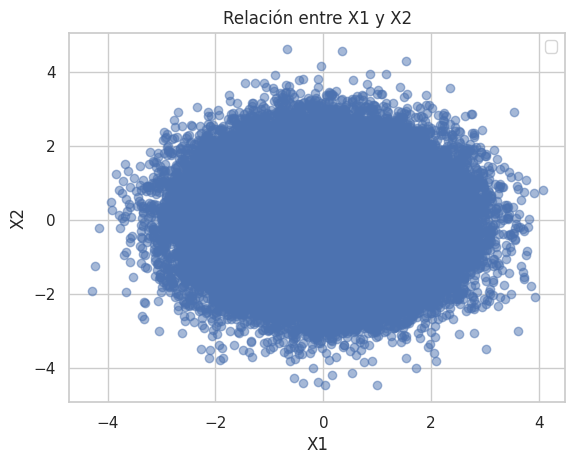

In [ ]:
# Gráfico de dispersión
plt.scatter(df['X1'], df['X2'], alpha=0.5)
plt.title("Relación entre X1 y X2")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.show()

Observación: No parece haber ninguna relación clara entre las variables numéricas, Solo se aprecia que la cantidad de valores outliers no es muy significativa.

**Reducción de Dimensionalidad con PCA**

In [ ]:
df.shape

(127013, 6)

In [ ]:
# Verificación del tipo de columnas para asegurarse de que tenemos suficientes columnas numéricas
datos_numericos = df.select_dtypes(include=['float64', 'int64'])

# Verificar las columnas numéricas disponibles
print("Columnas numéricas:", datos_numericos.columns)

# Verificar que tenemos al menos 5 columnas numéricas
if datos_numericos.shape[1] >= 5:
    # Seleccionar 5 características informativas
    informativas = datos_numericos.iloc[:, :5]

    # Crear 5 características redundantes combinando linealmente algunas de las columnas anteriores
    redundantes = datos_numericos.iloc[:, :5].copy()
    for i in range(5):
        redundantes[f'redundant_{i}'] = redundantes.iloc[:, i] + redundantes.iloc[:, (i+1)%5]

    # Concatenar las características informativas y redundantes
    X = pd.concat([informativas, redundantes], axis=1)

    # Crear una variable de objetivo (asumimos que 'Target' es la variable objetivo)
    if 'Target' in df.columns:
        y = df['Target']
    else:
        # Si no existe 'Target', generamos una variable objetivo aleatoria (simulando clases)
        y = np.random.randint(0, 2, size=X.shape[0])

    print("Características informativas:\n", informativas.head())
    print("Características redundantes:\n", redundantes.head())
    print("Características combinadas:\n", X.head())
    print("Variable objetivo:\n", y.head())

else:
    print("El dataset no tiene suficientes columnas numéricas para crear las características informativas y redundantes.")

Columnas numéricas: Index(['X1', 'X2', 'X3', 'X4', 'X5', 'Target'], dtype='object')
Características informativas:
          X1        X2        X3        X4        X5
0  0.496714 -0.138264  0.647689  1.523030 -0.234153
1 -0.234137  1.579213  0.767435 -0.469474  0.542560
2 -0.463418 -0.465730  0.241962 -1.913280 -1.724918
3 -0.562288 -1.012831  0.314247 -0.908024 -1.412304
4  1.465649 -0.225776  0.067528 -1.424748 -0.544383
Características redundantes:
          X1        X2        X3        X4        X5  redundant_0  redundant_1  \
0  0.496714 -0.138264  0.647689  1.523030 -0.234153     0.358450     0.509424   
1 -0.234137  1.579213  0.767435 -0.469474  0.542560     1.345076     2.346648   
2 -0.463418 -0.465730  0.241962 -1.913280 -1.724918    -0.929147    -0.223767   
3 -0.562288 -1.012831  0.314247 -0.908024 -1.412304    -1.575119    -0.698584   
4  1.465649 -0.225776  0.067528 -1.424748 -0.544383     1.239872    -0.158248   

   redundant_2  redundant_3  redundant_4  
0     2.17071

In [ ]:
df.shape

(127013, 6)

In [ ]:
# Verifica las dimensiones de X e y antes de dividir
print(f"X tiene {X.shape[0]} muestras y y tiene {y.shape[0]} muestras.")

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar las dimensiones después de la división
print(f"X_train tiene {X_train.shape[0]} muestras y X_test tiene {X_test.shape[0]} muestras.")
print(f"y_train tiene {y_train.shape[0]} muestras y y_test tiene {y_test.shape[0]} muestras.")

X tiene 127013 muestras y y tiene 127013 muestras.
X_train tiene 101610 muestras y X_test tiene 25403 muestras.
y_train tiene 101610 muestras y y_test tiene 25403 muestras.


In [136]:
# Entrenar modelo con todas las dimensiones originales (usando regresión)
clf_full = RandomForestRegressor(random_state=42)
clf_full.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [137]:
y_pred_full = clf_full.predict(X_test)

In [138]:
# Calcular el MSE (Error Cuadrático Medio)
mse_full = mean_squared_error(y_test, y_pred_full)

# Calcular el RMSE (Raíz del Error Cuadrático Medio)
rmse_full = np.sqrt(mse_full)

# Calcular R^2 (coeficiente de determinación)
r2_full = r2_score(y_test, y_pred_full)

# Mostrar resultados
print(f'MSE: {mse_full}')
print(f'RMSE: {rmse_full}')
print(f'R^2: {r2_full}')

MSE: 0.01077209693155645
RMSE: 0.10378871292947249
R^2: 0.9946169220989828


Observación: El modelo tiene una buena capacidad predictiva y explica bien la variabilidad de los datos. Ya que el MSE y la RMSE son bajos.

# **Conclusiones Finales**

1.- Para la obtención de estos resultados, ha sido necesario transformar los datos de las columnas 'points' y 'price' a datos de tipo object a 'float64', además de reemplazar los registros nulos de las variables precio y puntuación del dataset por su mediana. Estos registros nulos suman un total de 14.667 datos de un total de 259.950 registros de ambas columnas. Lo que equivale a reemplazar un 17.72% de los registros de las variables a utilizar.

2.- La cantidad total de vinos evaluado por los catadores en este dataset asciende a 23.623 vinos registrados.

3.-  Las variedades de vinos mejor evaluadas son: Bordeaux-style White Blend, Moscatel, Champagne Blend, Prugnolo Gentile, Chardonnay, Sangiovese, Portuguese Red, Merlot, Port, Sanguiovese Grosso, Syrah, Bordeaux-style Red Blend y Cabernet Sauvignon. De estas trece variedades, han sido diecisiete vinos los que han sido evaluados con la puntuación máxima.

4.- El precio promedio de las mejores variedades de vinos oscila entre los 1400 y 2050 US$.

5.- Las diez variedades de vinos mejor evaluadas tienen algunas de estas características:

Bordeaux-style Red Blend: Contiene taninos oscuros. Es un vino para un envejecimiento a largo plazo. Casi negro, denso, fragancia de frutas de grosella negra.

Syrah: Ricos aromas de frutas moradas, carne ahumada, cedro, lápiz de plomo, tierra húmeda, entre otros.

Prugnolo Gentile: Espeso, oscuro, caramelizado, aromas concentrados de dulce de leche, toffee, miel, regaliz, café, resina y jarabe de arce. Envejecido durante más de 10 años en barriles de roble, lo que da una concentración espesa y oscura.

Sangiovese Grosso: Intenso, oscuro y carnoso, de aromas de frutas oscuras, chocolate, especias y tabaco. Acidez, grosor y textura.

Champagne Blend: Vino joven, mineralizado, frutal, con acidez y perfume.

Portuguese Red: Grandes frutas, taninos.

Moscatel: Mantenerse en botella indefinidamente. Color marrón oscuro, aromas de rancio, higo seco, melaza y té negro, concentrado.

Sangiovesse: Fragante, fuerte y con un toque de especias. Taninos ultrafinos y una acidez equilibrada.

Port: Potente y maduro influenciado por sus taninos. Tiene una textura densa y firme. Vino concentrado.

6.- Las diez bodegas de vinos mejor evaluadas son: Chambers Rosewood Vineyards, ChÃ¢teau Cheval Blanc, Casa Ferreirinha, ChÃ¢teau Lafite Rothschild, ChÃ¢teau Haut-Brion, Louis Roederer, ChÃ¢teau LÃ©oville Las Cases, Biondi Santi, Charles Smith y ChÃ¢teau LÃ©oville Barton.

7.- Los diez paises con mejor evaluación en sus vinos según los expertos son: Italia, Estados Unidos, Australia, Francia, Portugal, Alemania, Austria, España, Hungría y Argentina.

8.- Existe una correlación de 0.40 entre las variables numéricas del dataset, y su correlación es positiva pero a la vez es relativamente media a baja.

9.- El modelo de análisis óptimo para este dataset es el método de regresión lineal múltiple.

10.- Por medio del entrenamiento del modelo mediante random forest regresor se obtienen buenos resultados de la regresión linel múltiple.

